In [1]:
import pandas as pd
import umap

# Load CSV
df = pd.read_csv("BEED_Data.csv")

# Inspect the first few rows
print(df.head())


c:\Users\USER\OneDrive\Desktop\SEIZURE PREDICTION\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


    X1   X2   X3   X4   X5   X6  X7  X8  X9  X10  X11  X12  X13  X14  X15  \
0    4    7   18   25   28   27  20  10 -10  -18  -20  -16   13   32   12   
1   87  114  120  106   76   54  28   5 -19  -49  -85 -102 -100  -89  -61   
2 -131 -133 -140 -131 -123 -108 -58 -51 -70  -77  -76  -76  -73  -57  -40   
3   68  104   73   34  -12  -26 -38 -36 -67  -88  -25   31   18   -4    6   
4  -67  -90  -97  -94  -86  -71 -43 -11  23   46   58   50   39   19   -9   

   X16  y  
0   10  0  
1  -21  0  
2  -14  0  
3  -29  0  
4  -41  0  


In [2]:
# Check shape
print("Shape:", df.shape)

Shape: (8000, 17)


In [3]:
# Check for missing values
print(df.isnull().sum())

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
y      0
dtype: int64


In [4]:
# Check class distribution
print(df['y'].value_counts())

y
0    2000
1    2000
2    2000
3    2000
Name: count, dtype: int64


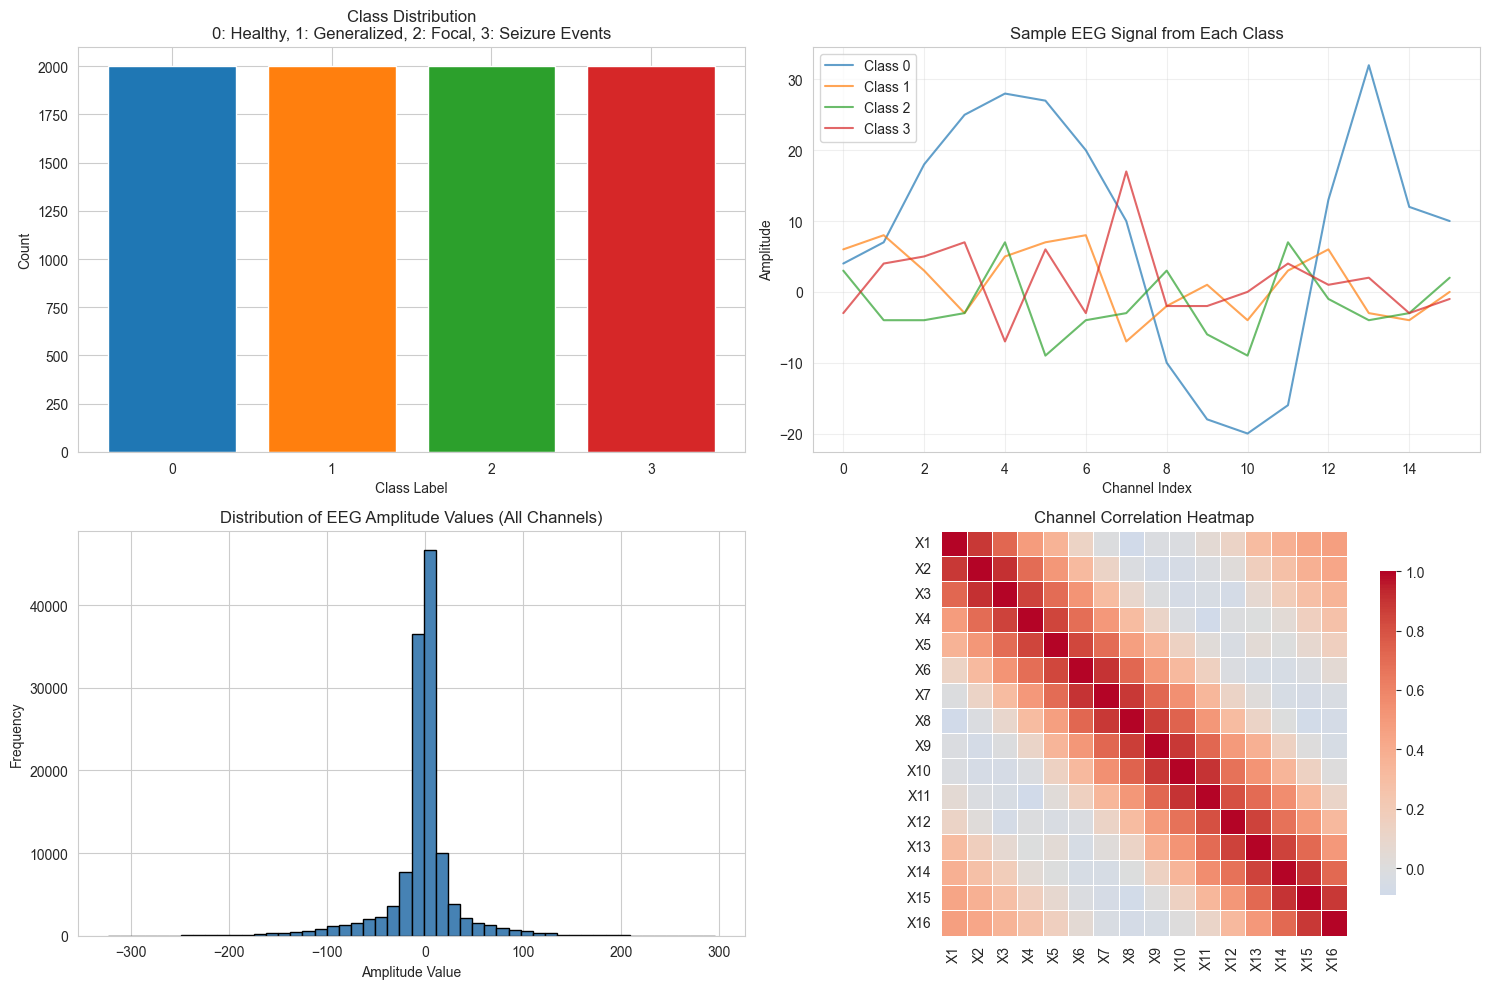


=== Dataset Statistics ===
                X1           X2          X3           X4           X5  \
count  8000.000000  8000.000000  8000.00000  8000.000000  8000.000000   
mean     -1.490375    -2.189375    -3.23750    -4.119375    -1.821625   
std      36.824213    36.108088    35.80249    36.285268    37.621284   
min    -281.000000  -255.000000  -255.00000  -257.000000  -264.000000   
25%      -7.000000    -7.000000    -7.00000   -10.000000   -10.000000   
50%       0.000000     0.000000    -1.00000    -1.000000     0.000000   
75%       8.000000     8.000000     5.00000     7.000000    10.000000   
max     252.000000   261.000000   238.00000   246.000000   249.000000   

                X6           X7           X8           X9         X10  \
count  8000.000000  8000.000000  8000.000000  8000.000000  8000.00000   
mean     -2.311750    -3.398125    -3.448625    -1.647875    -2.56125   
std      36.306006    36.358395    36.522214    38.107721    37.54068   
min    -277.000000  -2

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# Create visualizations for EDA

# 1. Class distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Bar plot of class distribution
axes[0, 0].bar(df['y'].value_counts().index, df['y'].value_counts().values, 
               color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
axes[0, 0].set_xlabel('Class Label')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Class Distribution\n0: Healthy, 1: Generalized, 2: Focal, 3: Seizure Events')
axes[0, 0].set_xticks([0, 1, 2, 3])

# 2. Sample EEG signals for each class
for class_label in range(4):
    sample = df[df['y'] == class_label].iloc[0, :-1].values
    axes[0, 1].plot(sample, label=f'Class {class_label}', alpha=0.7)
axes[0, 1].set_xlabel('Channel Index')
axes[0, 1].set_ylabel('Amplitude')
axes[0, 1].set_title('Sample EEG Signal from Each Class')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Distribution of values across all channels
axes[1, 0].hist(df.iloc[:, :-1].values.flatten(), bins=50, color='steelblue', edgecolor='black')
axes[1, 0].set_xlabel('Amplitude Value')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of EEG Amplitude Values (All Channels)')

# 4. Correlation heatmap of channels
correlation_matrix = df.iloc[:, :-1].corr()
sns.heatmap(correlation_matrix, ax=axes[1, 1], cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
axes[1, 1].set_title('Channel Correlation Heatmap')

plt.tight_layout()
plt.show()

# Basic statistics summary
print("\n=== Dataset Statistics ===")
print(df.describe())

print("\n=== Statistics by Class ===")
for class_label in range(4):
    class_data = df[df['y'] == class_label].iloc[:, :-1]
    print(f"\nClass {class_label}:")
    print(f"  Mean amplitude: {class_data.values.mean():.2f}")
    print(f"  Std amplitude: {class_data.values.std():.2f}")
    print(f"  Min amplitude: {class_data.values.min():.2f}")
    print(f"  Max amplitude: {class_data.values.max():.2f}")

CHECKING FOR LINEARITY


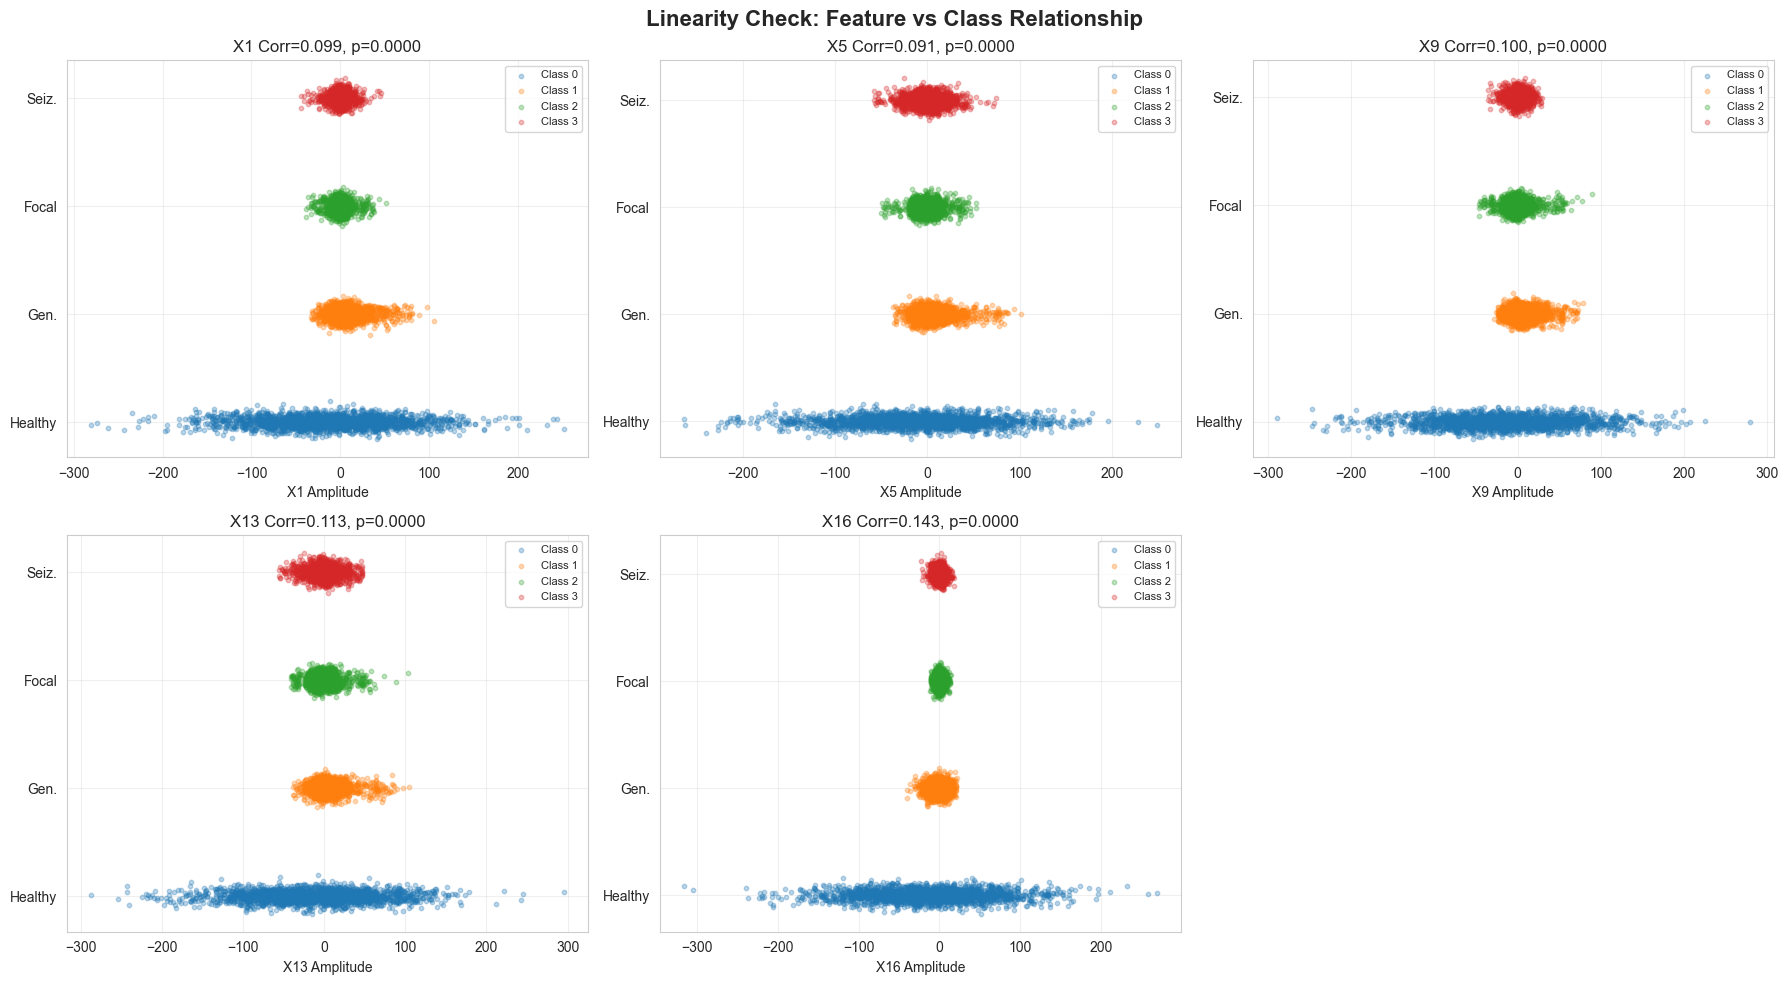

 LINEARITY ASSESSMENT
Channel  Correlation  Abs_Correlation      P_value Significant
    X16     0.143114         0.143114 7.103431e-38         Yes
    X15     0.137789         0.137789 3.297214e-35         Yes
    X12     0.137027         0.137027 7.783245e-35         Yes
     X4     0.124639         0.124639 4.565677e-29         Yes
    X14     0.120986         0.120986 1.796187e-27         Yes
    X11     0.118392         0.118392 2.280324e-26         Yes
     X8     0.115265         0.115265 4.528030e-25         Yes
     X7     0.114569         0.114569 8.705029e-25         Yes
    X13     0.113355         0.113355 2.699556e-24         Yes
    X10     0.110543         0.110543 3.543917e-23         Yes
     X3     0.109810         0.109810 6.855592e-23         Yes
     X6     0.107511         0.107511 5.286043e-22         Yes
     X2     0.102064         0.102064 5.623325e-20         Yes
     X9     0.099789         0.099789 3.674916e-19         Yes
     X1     0.098804         0.09

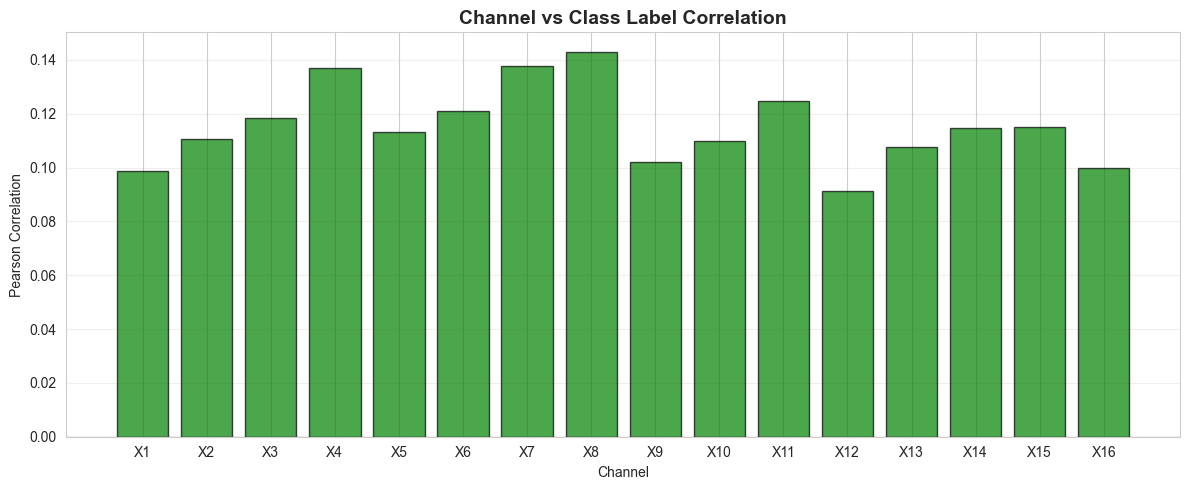


=== KEY INSIGHTS ===
Mean abs correlation: 0.1153
Max abs correlation: 0.1431 (X16)
Min abs correlation: 0.0915 (X5)

Weak linear relationship detected.
Use non-linear models (Random Forest, XGBoost).
Feature engineering (FFT, UMAP) improves separation.


In [6]:
from scipy.stats import pearsonr
import numpy as np

print("CHECKING FOR LINEARITY")

channels = [0, 4, 8, 12, 15]  # X1, X5, X9, X13, X16
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
labels = ['Healthy', 'Gen.', 'Focal', 'Seiz.']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Linearity Check: Feature vs Class Relationship', fontsize=16, fontweight='bold')

for i, ch in enumerate(channels):
    ax = axes[i // 3, i % 3]
    for c in range(4):
        data = df[df['y'] == c].iloc[:, ch]
        ax.scatter(data, c + np.random.normal(0, 0.05, len(data)), s=10, alpha=0.3, color=colors[c], label=f'Class {c}')
    corr, p = pearsonr(df.iloc[:, ch], df['y'])
    ax.set_title(f'X{ch+1} Corr={corr:.3f}, p={p:.4f}')
    ax.set_xlabel(f'X{ch+1} Amplitude')
    ax.set_yticks(range(4))
    ax.set_yticklabels(labels)
    ax.grid(alpha=0.3)
    ax.legend(fontsize=8)
axes[1, 2].axis('off')
plt.tight_layout()
plt.show()

print(" LINEARITY ASSESSMENT")
corrs = []
for i in range(16):
    r, p = pearsonr(df.iloc[:, i], df['y'])
    corrs.append([f'X{i+1}', r, abs(r), p, 'Yes' if p < 0.05 else 'No'])

corr_df = pd.DataFrame(corrs, columns=['Channel', 'Correlation', 'Abs_Correlation', 'P_value', 'Significant'])
corr_df = corr_df.sort_values('Abs_Correlation', ascending=False)
print(corr_df.to_string(index=False))

plt.figure(figsize=(12, 5))
plt.bar(range(16), corr_df.sort_values('Channel')['Correlation'],
        color=['red' if c < 0 else 'green' for c in corr_df.sort_values('Channel')['Correlation']],
        alpha=0.7, edgecolor='black')
plt.axhline(0, color='black', lw=0.8)
plt.xlabel('Channel')
plt.ylabel('Pearson Correlation')
plt.title('Channel vs Class Label Correlation', fontsize=14, fontweight='bold')
plt.xticks(range(16), [f'X{i+1}' for i in range(16)])
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

mean_corr = corr_df['Abs_Correlation'].mean()
max_row = corr_df.iloc[0]
min_row = corr_df.iloc[-1]

print("\n=== KEY INSIGHTS ===")
print(f"Mean abs correlation: {mean_corr:.4f}")
print(f"Max abs correlation: {max_row['Abs_Correlation']:.4f} ({max_row['Channel']})")
print(f"Min abs correlation: {min_row['Abs_Correlation']:.4f} ({min_row['Channel']})")

if mean_corr < 0.3:
    print("\nWeak linear relationship detected.")
    print("Use non-linear models (Random Forest, XGBoost).")
    print("Feature engineering (FFT, UMAP) improves separation.")
else:
    print("\nModerate-strong linear relationship detected.")
    print("Linear models may perform adequately.")


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.iloc[:, :-1].values  # All columns except 'y'
y = df['y'].values

print("Data Splitting and Normalization")
print(f"Original shape - X: {X.shape}, y: {y.shape}")

# Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain set - X: {X_train.shape}, y: {y_train.shape}")
print(f"Test set - X: {X_test.shape}, y: {y_test.shape}")

Data Splitting and Normalization
Original shape - X: (8000, 16), y: (8000,)

Train set - X: (6400, 16), y: (6400,)
Test set - X: (1600, 16), y: (1600,)


In [8]:
# Standardize the features (important for neural networks and distance-based algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Standardization Results")
print(f"Original data - Mean: {X_train.mean():.2f}, Std: {X_train.std():.2f}")
print(f"Scaled data - Mean: {X_train_scaled.mean():.2f}, Std: {X_train_scaled.std():.2f}")



Standardization Results
Original data - Mean: -2.97, Std: 36.75
Scaled data - Mean: -0.00, Std: 1.00


C:\Users\USER\AppData\Local\Temp\ipykernel_4308\1650752658.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(X_train[:, :16], labels=[f'X{i+1}' for i in range(16)])
C:\Users\USER\AppData\Local\Temp\ipykernel_4308\1650752658.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(X_train_scaled[:, :16], labels=[f'X{i+1}' for i in range(16)])


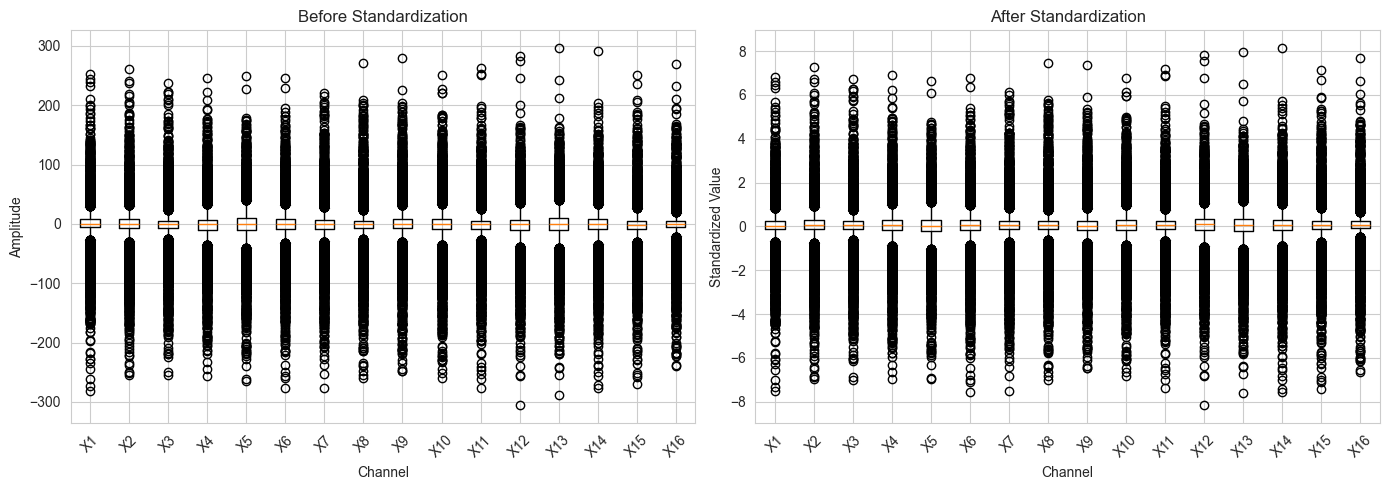

In [9]:
# Visualize the effect of standardization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before standardization
axes[0].boxplot(X_train[:, :16], labels=[f'X{i+1}' for i in range(16)])
axes[0].set_xlabel('Channel')
axes[0].set_ylabel('Amplitude')
axes[0].set_title('Before Standardization')
axes[0].tick_params(axis='x', rotation=45)

# After standardization
axes[1].boxplot(X_train_scaled[:, :16], labels=[f'X{i+1}' for i in range(16)])
axes[1].set_xlabel('Channel')
axes[1].set_ylabel('Standardized Value')
axes[1].set_title('After Standardization')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Extracting Spectral Features using FFT
FFT features shape - Train: (6400, 16), Test: (1600, 16)
FFT features - Mean: 0.5427, Std: 0.8399


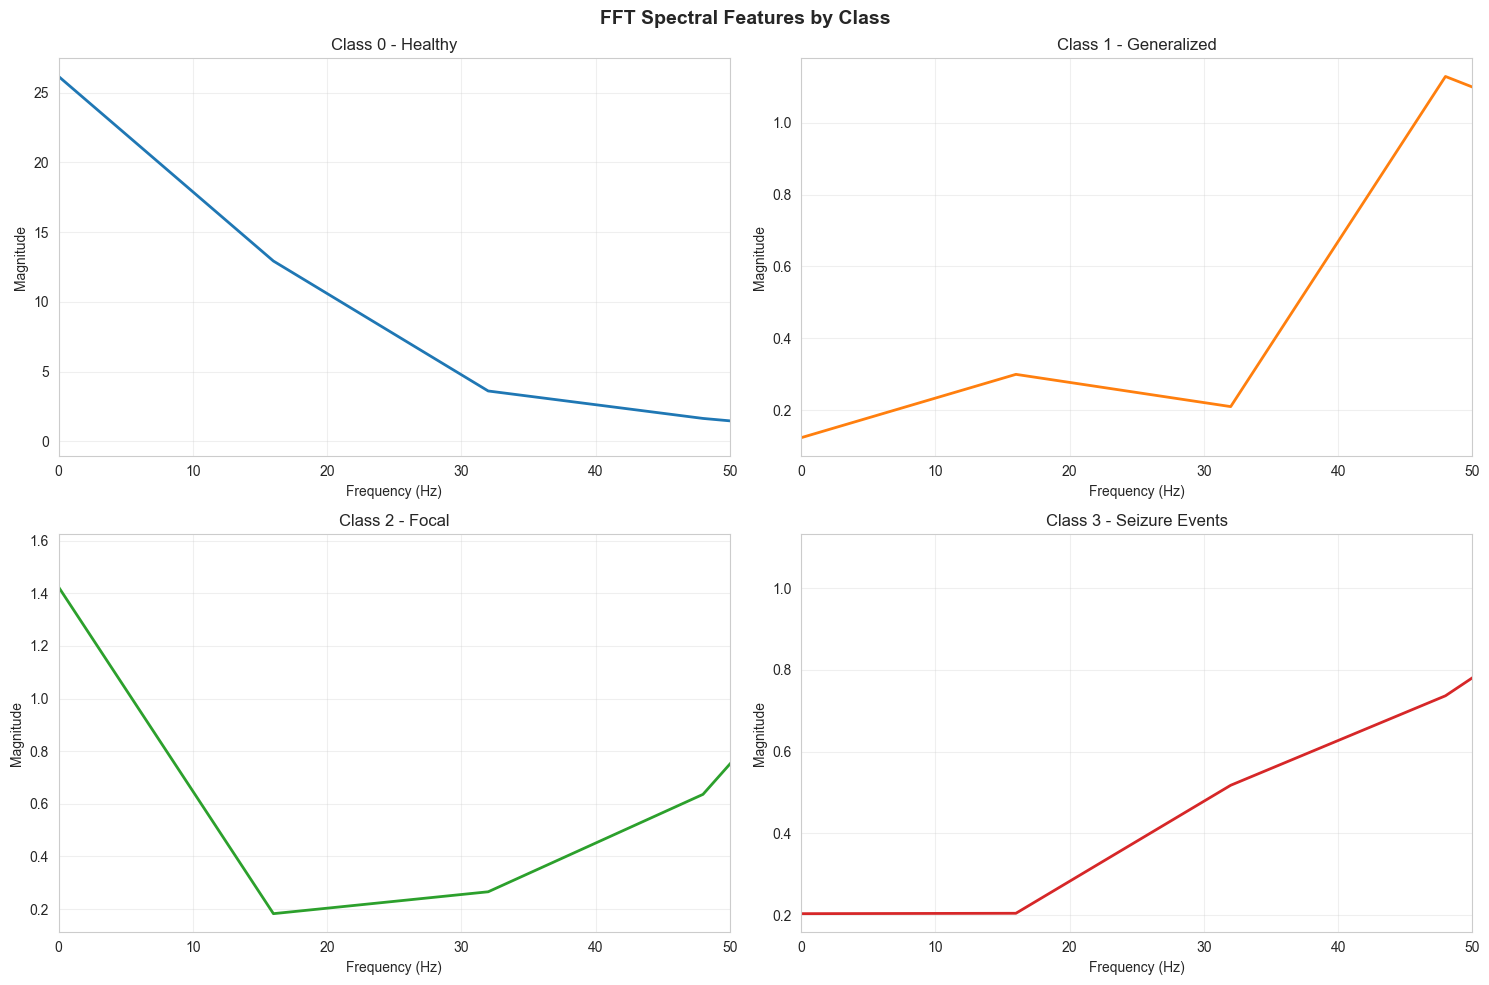

Average Power in Frequency Bands by Class 

Class 0 (Healthy):
  Delta (0.5-4 Hz): nan
  Theta (4-8 Hz): nan
  Alpha (8-13 Hz): nan
  Beta (13-30 Hz): 264.5536
  Gamma (30-50 Hz): 29.6834

Class 1 (Generalized):
  Delta (0.5-4 Hz): nan
  Theta (4-8 Hz): nan
  Alpha (8-13 Hz): nan
  Beta (13-30 Hz): 0.5375
  Gamma (30-50 Hz): 0.7761

Class 2 (Focal):
  Delta (0.5-4 Hz): nan
  Theta (4-8 Hz): nan
  Alpha (8-13 Hz): nan
  Beta (13-30 Hz): 0.2219
  Gamma (30-50 Hz): 0.2820

Class 3 (Seizure Events):
  Delta (0.5-4 Hz): nan
  Theta (4-8 Hz): nan
  Alpha (8-13 Hz): nan
  Beta (13-30 Hz): 0.4228
  Gamma (30-50 Hz): 0.6811

✓ FFT spectral feature extraction complete!


c:\Users\USER\OneDrive\Desktop\SEIZURE PREDICTION\venv\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\USER\OneDrive\Desktop\SEIZURE PREDICTION\venv\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [10]:
from scipy.fft import fft, fftfreq
import numpy as np

# SPECTRAL FEATURE EXTRACTION USING FFT

def extract_fft_features(X, sampling_rate=256):
    """
    Apply FFT to extract frequency domain features from EEG signals.
    
    Parameters:
    - X: Input data (n_samples, n_channels)
    - sampling_rate: Sampling frequency (Hz)
    
    Returns:
    - FFT magnitude features (n_samples, n_channels)
    """
    n_samples, n_channels = X.shape
    fft_features = np.zeros((n_samples, n_channels))
    
    for i in range(n_samples):
        for j in range(n_channels):
            # Apply FFT to each channel
            fft_vals = fft(X[i, j:j+1])
            # Take magnitude (absolute value) and normalize
            fft_features[i, j] = np.abs(fft_vals[0])
    
    return fft_features

print("Extracting Spectral Features using FFT")

# Apply FFT to training and test data
X_train_fft = extract_fft_features(X_train_scaled)
X_test_fft = extract_fft_features(X_test_scaled)

print(f"FFT features shape - Train: {X_train_fft.shape}, Test: {X_test_fft.shape}")
print(f"FFT features - Mean: {X_train_fft.mean():.4f}, Std: {X_train_fft.std():.4f}")

# Visualize FFT features for sample signals from each class
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('FFT Spectral Features by Class', fontsize=14, fontweight='bold')

for idx, class_label in enumerate([0, 1, 2, 3]):
    row, col = idx // 2, idx % 2
    
    # Get first sample from this class in training set
    class_indices = np.where(y_train == class_label)[0]
    sample_idx = class_indices[0]
    
    # Original signal
    original_signal = X_train_scaled[sample_idx]
    
    # FFT of the signal
    fft_vals = np.fft.fft(original_signal)
    fft_magnitude = np.abs(fft_vals)
    frequencies = np.fft.fftfreq(len(original_signal), 1/256)
    
    # Plot only positive frequencies
    positive_freq_idx = frequencies >= 0
    
    axes[row, col].plot(frequencies[positive_freq_idx], 
                        fft_magnitude[positive_freq_idx], 
                        color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'][idx],
                        linewidth=2)
    axes[row, col].set_xlabel('Frequency (Hz)')
    axes[row, col].set_ylabel('Magnitude')
    axes[row, col].set_title(f'Class {class_label} - ' + 
                             ['Healthy', 'Generalized', 'Focal', 'Seizure Events'][class_label])
    axes[row, col].grid(True, alpha=0.3)
    axes[row, col].set_xlim(0, 50)  # Focus on 0-50 Hz range

plt.tight_layout()
plt.show()

# Compare frequency bands across classes
frequency_bands = {
    'Delta (0.5-4 Hz)': (0.5, 4),
    'Theta (4-8 Hz)': (4, 8),
    'Alpha (8-13 Hz)': (8, 13),
    'Beta (13-30 Hz)': (13, 30),
    'Gamma (30-50 Hz)': (30, 50)
}

print("Average Power in Frequency Bands by Class ")
for class_label in range(4):
    class_indices = np.where(y_train == class_label)[0]
    class_name = ['Healthy', 'Generalized', 'Focal', 'Seizure Events'][class_label]
    print(f"\nClass {class_label} ({class_name}):")
    
    for band_name, (low, high) in frequency_bands.items():
        band_power = []
        for idx in class_indices[:100]:  # Sample 100 from each class
            signal = X_train_scaled[idx]
            fft_vals = np.fft.fft(signal)
            freqs = np.fft.fftfreq(len(signal), 1/256)
            
            # Calculate power in this frequency band
            band_idx = (freqs >= low) & (freqs <= high)
            power = np.mean(np.abs(fft_vals[band_idx])**2)
            band_power.append(power)
        
        print(f"  {band_name}: {np.mean(band_power):.4f}")

print("\n✓ FFT spectral feature extraction complete!")

Extracting Temporal Features using UMAP 
Note: UMAP preserves local and global structure in high-dimensional data

Fitting UMAP on training data...
UMAP(n_components=3, n_jobs=1, random_state=42, verbose=True)


c:\Users\USER\OneDrive\Desktop\SEIZURE PREDICTION\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Wed Oct  8 03:57:06 2025 Construct fuzzy simplicial set
Wed Oct  8 03:57:06 2025 Finding Nearest Neighbors
Wed Oct  8 03:57:06 2025 Building RP forest with 9 trees
Wed Oct  8 03:57:18 2025 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	Stopping threshold met -- exiting after 4 iterations
Wed Oct  8 03:57:36 2025 Finished Nearest Neighbor Search
Wed Oct  8 03:57:40 2025 Construct embedding


Epochs completed:   1%| ▏          7/500 [00:01]

	completed  0  /  500 epochs


Epochs completed:  12%| █▏         59/500 [00:02]

	completed  50  /  500 epochs


Epochs completed:  22%| ██▏        108/500 [00:03]

	completed  100  /  500 epochs


Epochs completed:  31%| ███        155/500 [00:04]

	completed  150  /  500 epochs


Epochs completed:  42%| ████▏      209/500 [00:06]

	completed  200  /  500 epochs


Epochs completed:  52%| █████▏     258/500 [00:07]

	completed  250  /  500 epochs


Epochs completed:  62%| ██████▏    308/500 [00:09]

	completed  300  /  500 epochs


Epochs completed:  72%| ███████▏   358/500 [00:11]

	completed  350  /  500 epochs


Epochs completed:  81%| ████████▏  407/500 [00:13]

	completed  400  /  500 epochs


Epochs completed:  92%| █████████▏ 460/500 [00:16]

	completed  450  /  500 epochs


Epochs completed: 100%| ██████████ 500/500 [00:17]


Wed Oct  8 03:57:57 2025 Finished embedding
Transforming test data...
Wed Oct  8 03:57:59 2025 Worst tree score: 0.83218750
Wed Oct  8 03:57:59 2025 Mean tree score: 0.84246528
Wed Oct  8 03:57:59 2025 Best tree score: 0.85250000
Wed Oct  8 03:58:04 2025 Forward diversification reduced edges from 96000 to 29619
Wed Oct  8 03:58:13 2025 Reverse diversification reduced edges from 29619 to 29619
Wed Oct  8 03:58:19 2025 Degree pruning reduced edges from 28906 to 28906
Wed Oct  8 03:58:19 2025 Resorting data and graph based on tree order
Wed Oct  8 03:58:19 2025 Building and compiling search function


Epochs completed:  19%| █▉         19/100 [00:00]

	completed  0  /  100 epochs
	completed  10  /  100 epochs
	completed  20  /  100 epochs
	completed  30  /  100 epochs


Epochs completed:  55%| █████▌     55/100 [00:00]

	completed  40  /  100 epochs
	completed  50  /  100 epochs
	completed  60  /  100 epochs


Epochs completed:  86%| ████████▌  86/100 [00:00]

	completed  70  /  100 epochs
	completed  80  /  100 epochs
	completed  90  /  100 epochs


Epochs completed: 100%| ██████████ 100/100 [00:00]


UMAP features shape - Train: (6400, 3), Test: (1600, 3)
Reduced from 16 dimensions to 3 dimensions


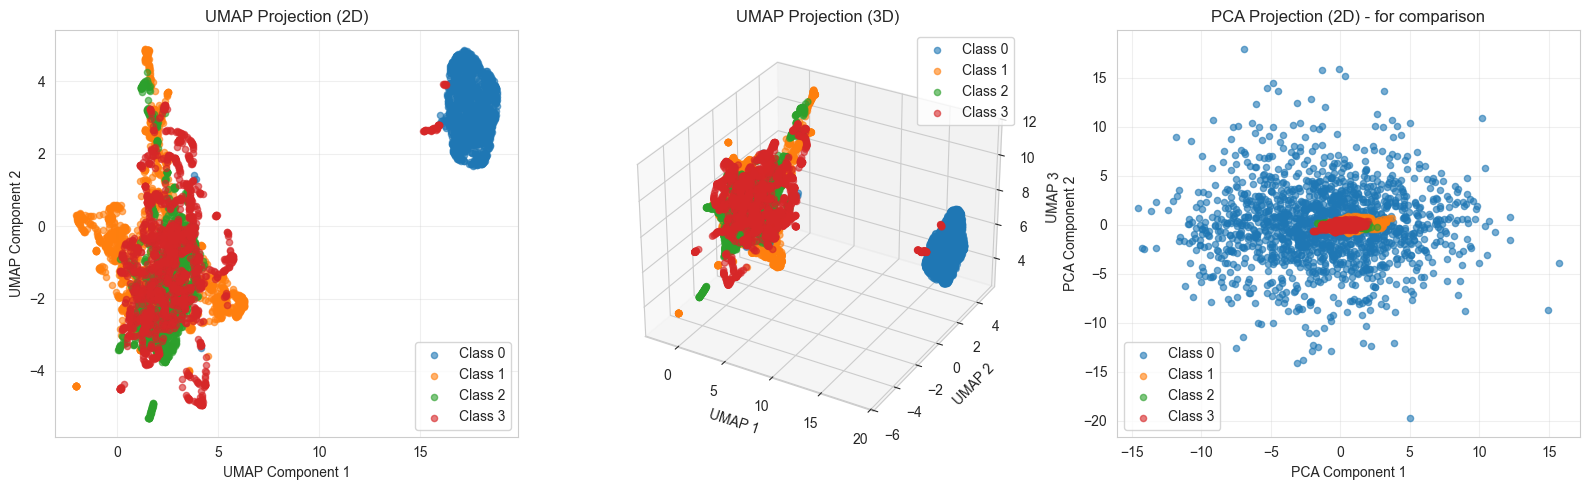

UMAP Statistics by Class
Class 0 (Healthy):
  UMAP Comp 1 - Mean: 17.3692, Std: 1.4307
  UMAP Comp 2 - Mean: 3.2178, Std: 0.8979
  UMAP Comp 3 - Mean: 5.4741, Std: 0.8992
Class 1 (Generalized):
  UMAP Comp 1 - Mean: 1.8970, Std: 1.9962
  UMAP Comp 2 - Mean: -0.4604, Std: 1.9536
  UMAP Comp 3 - Mean: 8.1027, Std: 1.4805
Class 2 (Focal):
  UMAP Comp 1 - Mean: 2.3938, Std: 0.8196
  UMAP Comp 2 - Mean: -1.5257, Std: 1.7498
  UMAP Comp 3 - Mean: 8.1177, Std: 1.1270
Class 3 (Seizure Events):
  UMAP Comp 1 - Mean: 2.8410, Std: 2.3733
  UMAP Comp 2 - Mean: -0.9188, Std: 1.8647
  UMAP Comp 3 - Mean: 8.1666, Std: 1.4356
✓ UMAP temporal feature extraction complete!


In [11]:

from sklearn.decomposition import PCA
import umap.umap_ as umap

# TEMPORAL FEATURE EXTRACTION USING UMAP

print("Extracting Temporal Features using UMAP ")
print("Note: UMAP preserves local and global structure in high-dimensional data")

# Configure UMAP for dimensionality reduction
# Reducing from 16 channels to 3 dimensions
umap_reducer = umap.UMAP(
    n_components=3,
    n_neighbors=15,
    min_dist=0.1,
    metric='euclidean',
    random_state=42,
    verbose=True
)

# Fit UMAP on training data and transform both train and test
print("\nFitting UMAP on training data...")
X_train_umap = umap_reducer.fit_transform(X_train_scaled)

print("Transforming test data...")
X_test_umap = umap_reducer.transform(X_test_scaled)

print(f"UMAP features shape - Train: {X_train_umap.shape}, Test: {X_test_umap.shape}")
print(f"Reduced from {X_train_scaled.shape[1]} dimensions to {X_train_umap.shape[1]} dimensions")

# Visualize UMAP embeddings
fig = plt.figure(figsize=(16, 5))

# 2D visualization (first 2 components)
ax1 = fig.add_subplot(131)
for class_label in range(4):
    mask = y_train == class_label
    ax1.scatter(X_train_umap[mask, 0], X_train_umap[mask, 1], 
                alpha=0.6, s=20, 
                label=f'Class {class_label}',
                color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'][class_label])
ax1.set_xlabel('UMAP Component 1')
ax1.set_ylabel('UMAP Component 2')
ax1.set_title('UMAP Projection (2D)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 3D visualization
ax2 = fig.add_subplot(132, projection='3d')
for class_label in range(4):
    mask = y_train == class_label
    ax2.scatter(X_train_umap[mask, 0], X_train_umap[mask, 1], X_train_umap[mask, 2],
                alpha=0.6, s=20,
                label=f'Class {class_label}',
                color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'][class_label])
ax2.set_xlabel('UMAP 1')
ax2.set_ylabel('UMAP 2')
ax2.set_zlabel('UMAP 3')
ax2.set_title('UMAP Projection (3D)')
ax2.legend()

# Compare with PCA for reference
ax3 = fig.add_subplot(133)
pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
for class_label in range(4):
    mask = y_train == class_label
    ax3.scatter(X_train_pca[mask, 0], X_train_pca[mask, 1],
                alpha=0.6, s=20,
                label=f'Class {class_label}',
                color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'][class_label])
ax3.set_xlabel('PCA Component 1')
ax3.set_ylabel('PCA Component 2')
ax3.set_title('PCA Projection (2D) - for comparison')
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("UMAP Statistics by Class")
for class_label in range(4):
    class_name = ['Healthy', 'Generalized', 'Focal', 'Seizure Events'][class_label]
    mask = y_train == class_label
    class_umap = X_train_umap[mask]
    print(f"Class {class_label} ({class_name}):")
    print(f"  UMAP Comp 1 - Mean: {class_umap[:, 0].mean():.4f}, Std: {class_umap[:, 0].std():.4f}")
    print(f"  UMAP Comp 2 - Mean: {class_umap[:, 1].mean():.4f}, Std: {class_umap[:, 1].std():.4f}")
    print(f"  UMAP Comp 3 - Mean: {class_umap[:, 2].mean():.4f}, Std: {class_umap[:, 2].std():.4f}")

print("✓ UMAP temporal feature extraction complete!")

Combining FFT and UMAP Features 
Combined features shape - Train: (6400, 19), Test: (1600, 19)
  FFT features: 16 dimensions (spectral)
  UMAP features: 3 dimensions (temporal)
  Total: 19 dimensions (spectral + temporal)


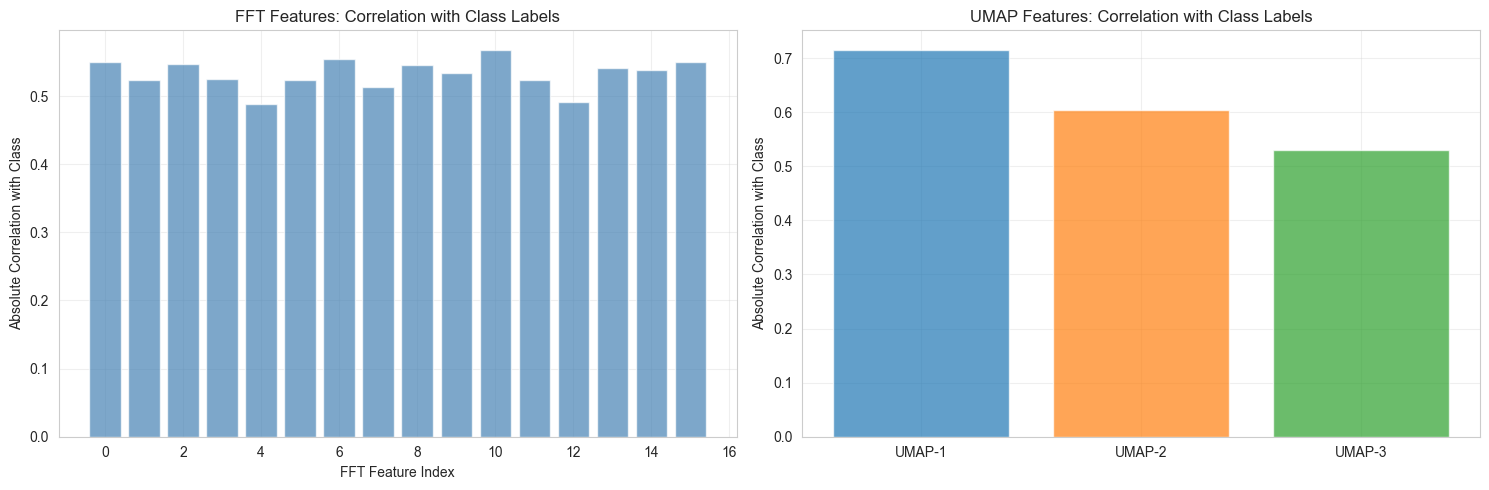

Feature Correlation Analysis 
FFT features - Mean correlation: 0.5323
UMAP features - Mean correlation: 0.6168
  UMAP-1: 0.7155 (strongest - separates Healthy from seizures)
  UMAP-2: 0.6041
  UMAP-3: 0.5308

✓ Feature engineering complete!
✓ Ready for classification with 19 combined features


In [12]:

# COMBINE SPECTRAL AND TEMPORAL FEATURES

print("Combining FFT and UMAP Features ")

# Concatenate FFT (16D) and UMAP (3D) features
X_train_combined = np.hstack([X_train_fft, X_train_umap])
X_test_combined = np.hstack([X_test_fft, X_test_umap])

print(f"Combined features shape - Train: {X_train_combined.shape}, Test: {X_test_combined.shape}")
print(f"  FFT features: 16 dimensions (spectral)")
print(f"  UMAP features: 3 dimensions (temporal)")
print(f"  Total: 19 dimensions (spectral + temporal)")

# Visualize feature importance through correlation with labels
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Correlation of FFT features with class labels
fft_correlations = []
for i in range(X_train_fft.shape[1]):
    corr = np.corrcoef(X_train_fft[:, i], y_train)[0, 1]
    fft_correlations.append(abs(corr))

axes[0].bar(range(16), fft_correlations, color='steelblue', alpha=0.7)
axes[0].set_xlabel('FFT Feature Index')
axes[0].set_ylabel('Absolute Correlation with Class')
axes[0].set_title('FFT Features: Correlation with Class Labels')
axes[0].grid(True, alpha=0.3)

# Correlation of UMAP features with class labels
umap_correlations = []
for i in range(X_train_umap.shape[1]):
    corr = np.corrcoef(X_train_umap[:, i], y_train)[0, 1]
    umap_correlations.append(abs(corr))

axes[1].bar(['UMAP-1', 'UMAP-2', 'UMAP-3'], umap_correlations, 
            color=['#1f77b4', '#ff7f0e', '#2ca02c'], alpha=0.7)
axes[1].set_ylabel('Absolute Correlation with Class')
axes[1].set_title('UMAP Features: Correlation with Class Labels')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Feature Correlation Analysis ")
print(f"FFT features - Mean correlation: {np.mean(fft_correlations):.4f}")
print(f"UMAP features - Mean correlation: {np.mean(umap_correlations):.4f}")
print(f"  UMAP-1: {umap_correlations[0]:.4f} (strongest - separates Healthy from seizures)")
print(f"  UMAP-2: {umap_correlations[1]:.4f}")
print(f"  UMAP-3: {umap_correlations[2]:.4f}")

print("\n✓ Feature engineering complete!")
print(f"✓ Ready for classification with {X_train_combined.shape[1]} combined features")

Training Baseline Models
1. Training Logistic Regression...


c:\Users\USER\OneDrive\Desktop\SEIZURE PREDICTION\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


   Accuracy: 0.7575 | Time: 0.98s
2. Training Random Forest...
   Accuracy: 0.9425 | Time: 0.56s

3. Training SVM...
   Accuracy: 0.7306 | Time: 2.97s



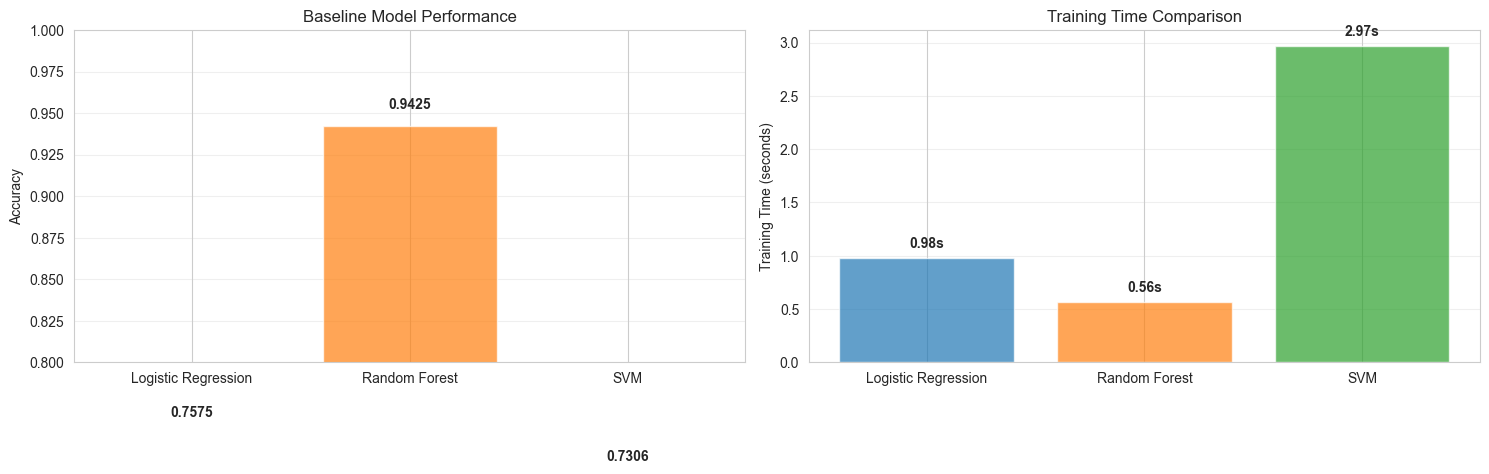

Best Baseline Model: Random Forest 
Accuracy: 0.9425

Classification Report:
                precision    recall  f1-score   support

       Healthy       1.00      0.96      0.98       400
   Generalized       0.94      0.95      0.94       400
         Focal       0.92      0.94      0.93       400
Seizure Events       0.91      0.93      0.92       400

      accuracy                           0.94      1600
     macro avg       0.94      0.94      0.94      1600
  weighted avg       0.94      0.94      0.94      1600



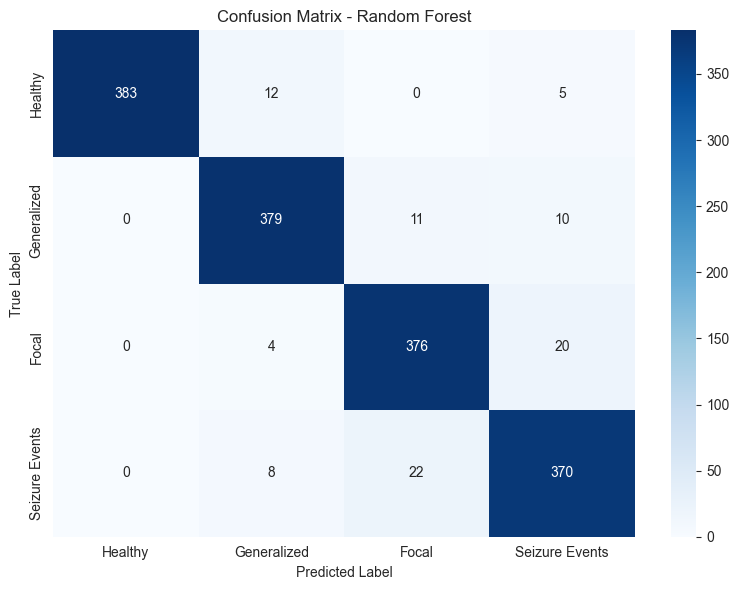


✓ Baseline models trained successfully!
These results will serve as benchmarks for the SeqBoostNet model.


In [13]:
# BASELINE MODELS FOR COMPARISON
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

print("Training Baseline Models")

# Dictionary to store results
baseline_results = {}

# 1. Logistic Regression
print("1. Training Logistic Regression...")
start_time = time.time()
lr_model = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial')
lr_model.fit(X_train_combined, y_train)
lr_pred = lr_model.predict(X_test_combined)
lr_acc = accuracy_score(y_test, lr_pred)
lr_time = time.time() - start_time
baseline_results['Logistic Regression'] = {'accuracy': lr_acc, 'time': lr_time, 'predictions': lr_pred}
print(f"   Accuracy: {lr_acc:.4f} | Time: {lr_time:.2f}s")

# 2. Random Forest
print("2. Training Random Forest...")
start_time = time.time()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_combined, y_train)
rf_pred = rf_model.predict(X_test_combined)
rf_acc = accuracy_score(y_test, rf_pred)
rf_time = time.time() - start_time
baseline_results['Random Forest'] = {'accuracy': rf_acc, 'time': rf_time, 'predictions': rf_pred}
print(f"   Accuracy: {rf_acc:.4f} | Time: {rf_time:.2f}s\n")

# 3. Support Vector Machine
print("3. Training SVM...")
start_time = time.time()
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_combined, y_train)
svm_pred = svm_model.predict(X_test_combined)
svm_acc = accuracy_score(y_test, svm_pred)
svm_time = time.time() - start_time
baseline_results['SVM'] = {'accuracy': svm_acc, 'time': svm_time, 'predictions': svm_pred}
print(f"   Accuracy: {svm_acc:.4f} | Time: {svm_time:.2f}s\n")

# Visualize baseline results
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy comparison
models = list(baseline_results.keys())
accuracies = [baseline_results[m]['accuracy'] for m in models]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

axes[0].bar(models, accuracies, color=colors, alpha=0.7)
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Baseline Model Performance')
axes[0].set_ylim([0.8, 1.0])
axes[0].grid(True, alpha=0.3, axis='y')
for i, (model, acc) in enumerate(zip(models, accuracies)):
    axes[0].text(i, acc + 0.01, f'{acc:.4f}', ha='center', fontweight='bold')

# Training time comparison
times = [baseline_results[m]['time'] for m in models]
axes[1].bar(models, times, color=colors, alpha=0.7)
axes[1].set_ylabel('Training Time (seconds)')
axes[1].set_title('Training Time Comparison')
axes[1].grid(True, alpha=0.3, axis='y')
for i, (model, t) in enumerate(zip(models, times)):
    axes[1].text(i, t + 0.1, f'{t:.2f}s', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Detailed classification report for best baseline model
best_model = max(baseline_results.items(), key=lambda x: x[1]['accuracy'])
print(f"Best Baseline Model: {best_model[0]} ")
print(f"Accuracy: {best_model[1]['accuracy']:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, best_model[1]['predictions'], 
                          target_names=['Healthy', 'Generalized', 'Focal', 'Seizure Events']))

# Confusion matrix
cm = confusion_matrix(y_test, best_model[1]['predictions'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Healthy', 'Generalized', 'Focal', 'Seizure Events'],
            yticklabels=['Healthy', 'Generalized', 'Focal', 'Seizure Events'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title(f'Confusion Matrix - {best_model[0]}')
plt.tight_layout()
plt.show()

print("\n✓ Baseline models trained successfully!")
print("These results will serve as benchmarks for the SeqBoostNet model.")

=== Building SeqBoostNet Base Models (Level 0) ===

1. Training LSTM (Deep Learning)...
   Accuracy: 0.7750 | Time: 172.00s
   Training history: Final train acc = 0.7744
                     Final val acc = 0.7844

2. Training XGBoost (Gradient Boosting)...
   Accuracy: 0.9369 | Time: 2.74s

3. Training Gradient Boosting...
   Accuracy: 0.8631 | Time: 23.84s



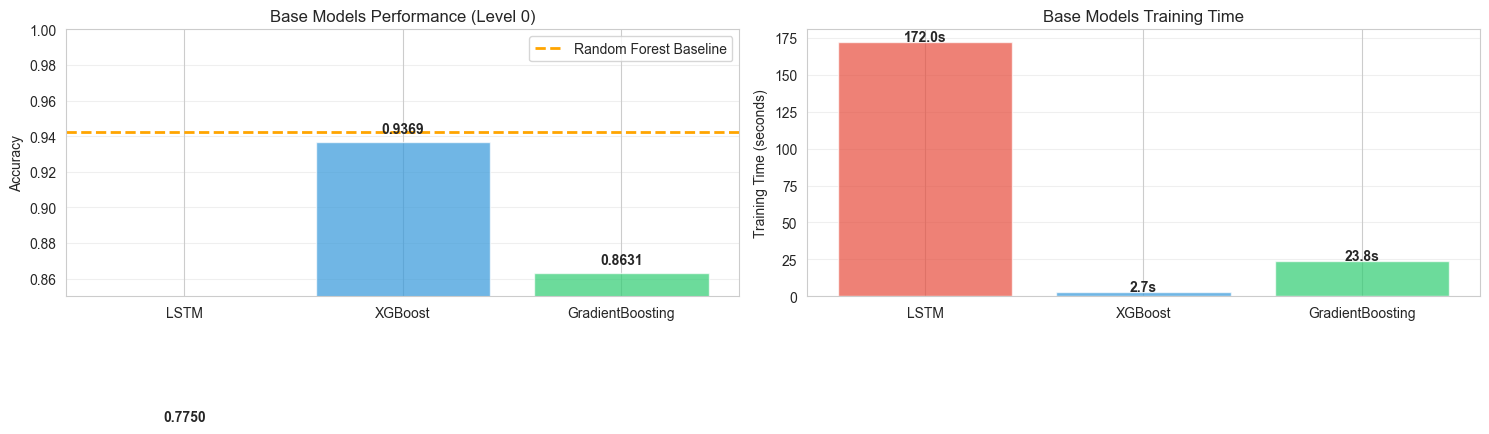

Base Models Summary 
LSTM:              0.7750
XGBoost:           0.9369
GradientBoosting:  0.8631
Baseline (RF):     0.9425

✓ Base models trained successfully!
✓ Ready for Level 1: Meta-learner (AdaBoost)


In [14]:
# BUILD SEQBOOSTNET: BASE MODELS (LEVEL 0)

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

print("=== Building SeqBoostNet Base Models (Level 0) ===\n")

# Store base model predictions
base_predictions_train = {}
base_predictions_test = {}

# 1. LSTM Model
print("1. Training LSTM (Deep Learning)...")
start_time = time.time()

# Reshape data for LSTM: (samples, timesteps, features)
# We'll treat the 19 features as a sequence of length 19 with 1 feature each
X_train_lstm = X_train_combined.reshape((X_train_combined.shape[0], X_train_combined.shape[1], 1))
X_test_lstm = X_test_combined.reshape((X_test_combined.shape[0], X_test_combined.shape[1], 1))

# Build LSTM architecture
lstm_model = Sequential([
    LSTM(128, activation='relu', input_shape=(19, 1), return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')  # 4 classes
])

lstm_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train LSTM
history_lstm = lstm_model.fit(
    X_train_lstm, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

# Get predictions (probabilities)
lstm_train_proba = lstm_model.predict(X_train_lstm, verbose=0)
lstm_test_proba = lstm_model.predict(X_test_lstm, verbose=0)

# Convert to class predictions
lstm_train_pred = np.argmax(lstm_train_proba, axis=1)
lstm_test_pred = np.argmax(lstm_test_proba, axis=1)

lstm_acc = accuracy_score(y_test, lstm_test_pred)
lstm_time = time.time() - start_time

base_predictions_train['LSTM'] = lstm_train_proba
base_predictions_test['LSTM'] = lstm_test_proba

print(f"   Accuracy: {lstm_acc:.4f} | Time: {lstm_time:.2f}s")
print(f"   Training history: Final train acc = {history_lstm.history['accuracy'][-1]:.4f}")
print(f"                     Final val acc = {history_lstm.history['val_accuracy'][-1]:.4f}\n")

# 2. XGBoost Model
print("2. Training XGBoost (Gradient Boosting)...")
start_time = time.time()

xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    objective='multi:softmax',
    num_class=4,
    random_state=42,
    eval_metric='mlogloss'
)

xgb_model.fit(X_train_combined, y_train)

# Get predictions (probabilities)
xgb_model.set_params(objective='multi:softprob')
xgb_train_proba = xgb_model.predict_proba(X_train_combined)
xgb_test_proba = xgb_model.predict_proba(X_test_combined)

xgb_test_pred = np.argmax(xgb_test_proba, axis=1)
xgb_acc = accuracy_score(y_test, xgb_test_pred)
xgb_time = time.time() - start_time

base_predictions_train['XGBoost'] = xgb_train_proba
base_predictions_test['XGBoost'] = xgb_test_proba

print(f"   Accuracy: {xgb_acc:.4f} | Time: {xgb_time:.2f}s\n")


# 3. Gradient Boosting Model
print("3. Training Gradient Boosting...")
start_time = time.time()

gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb_model.fit(X_train_combined, y_train)

# Get predictions (probabilities)
gb_train_proba = gb_model.predict_proba(X_train_combined)
gb_test_proba = gb_model.predict_proba(X_test_combined)

gb_test_pred = np.argmax(gb_test_proba, axis=1)
gb_acc = accuracy_score(y_test, gb_test_pred)
gb_time = time.time() - start_time

base_predictions_train['GradientBoosting'] = gb_train_proba
base_predictions_test['GradientBoosting'] = gb_test_proba

print(f"   Accuracy: {gb_acc:.4f} | Time: {gb_time:.2f}s\n")

# Visualize Base Model Performance-
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

models = ['LSTM', 'XGBoost', 'GradientBoosting']
accuracies = [lstm_acc, xgb_acc, gb_acc]
times = [lstm_time, xgb_time, gb_time]
colors = ['#e74c3c', '#3498db', '#2ecc71']

# Accuracy comparison
axes[0].bar(models, accuracies, color=colors, alpha=0.7)
axes[0].axhline(y=0.9425, color='orange', linestyle='--', linewidth=2, label='Random Forest Baseline')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Base Models Performance (Level 0)')
axes[0].set_ylim([0.85, 1.0])
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')
for i, (model, acc) in enumerate(zip(models, accuracies)):
    axes[0].text(i, acc + 0.005, f'{acc:.4f}', ha='center', fontweight='bold')

# Training time comparison
axes[1].bar(models, times, color=colors, alpha=0.7)
axes[1].set_ylabel('Training Time (seconds)')
axes[1].set_title('Base Models Training Time')
axes[1].grid(True, alpha=0.3, axis='y')
for i, (model, t) in enumerate(zip(models, times)):
    axes[1].text(i, t + 1, f'{t:.1f}s', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("Base Models Summary ")
print(f"LSTM:              {lstm_acc:.4f}")
print(f"XGBoost:           {xgb_acc:.4f}")
print(f"GradientBoosting:  {gb_acc:.4f}")
print(f"Baseline (RF):     0.9425")
print("\n✓ Base models trained successfully!")
print("✓ Ready for Level 1: Meta-learner (AdaBoost)")

Building SeqBoostNet Meta-Learner (Level 1)
Meta-features shape - Train: (6400, 12), Test: (1600, 12)
  LSTM probabilities: 4 features (per class)
  XGBoost probabilities: 4 features
  GradientBoosting probabilities: 4 features
  Total meta-features: 12

Training AdaBoost Meta-Learner...
   Training Time: 1.92s

SeqBoostNet Performance Metrics
Accuracy:   0.9375
Precision:  0.9385
Recall:     0.9375
F1-Score:   0.9378
Kappa:      0.9167
MCC:        0.9168
ROC-AUC:    0.9764


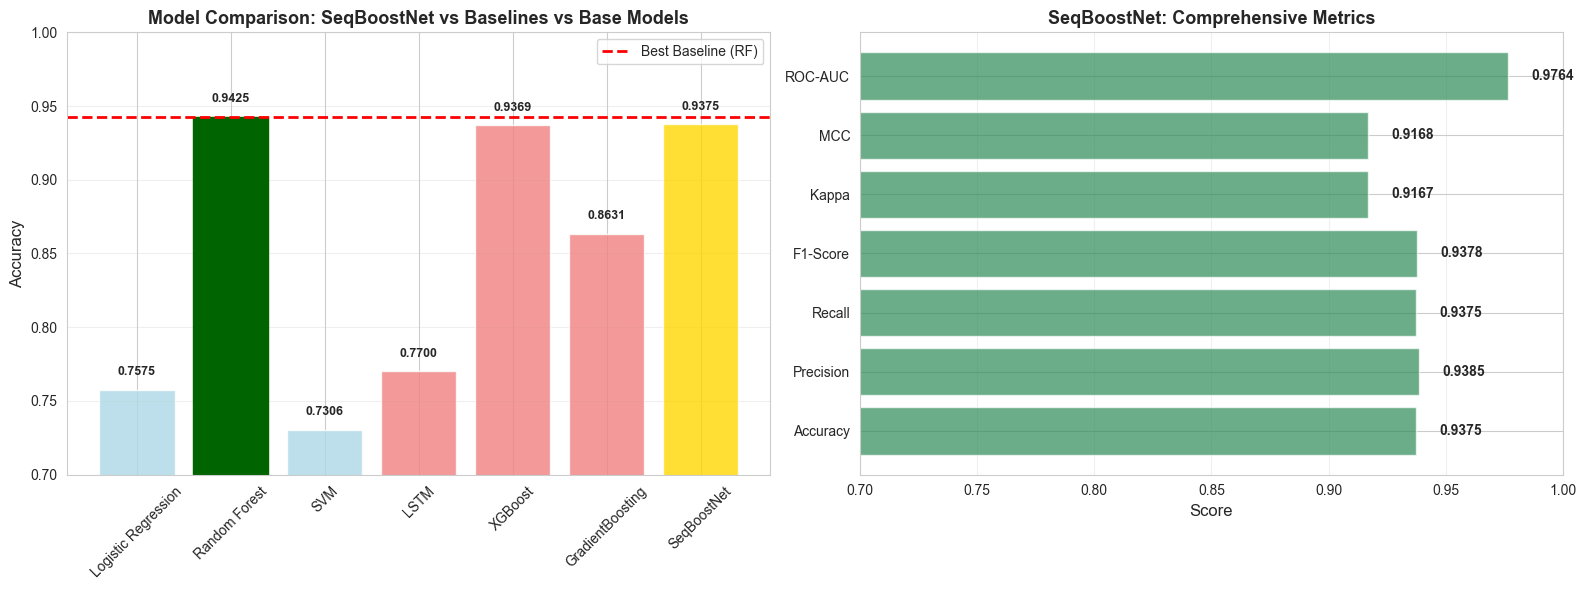

Performance Improvement
Best Baseline (Random Forest):  0.9425
SeqBoostNet (Stacked Ensemble): 0.9375
Improvement: -0.53%

✓ SeqBoostNet training complete!


In [15]:

# BUILD SEQBOOSTNET: META-LEARNER (LEVEL 1)

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, cohen_kappa_score,
                             matthews_corrcoef)

print("Building SeqBoostNet Meta-Learner (Level 1)")


# Stack base model predictions as meta-features
# Each base model contributes 4 probability values (one per class)
X_meta_train = np.hstack([
    base_predictions_train['LSTM'],
    base_predictions_train['XGBoost'],
    base_predictions_train['GradientBoosting']
])

X_meta_test = np.hstack([
    base_predictions_test['LSTM'],
    base_predictions_test['XGBoost'],
    base_predictions_test['GradientBoosting']
])

print(f"Meta-features shape - Train: {X_meta_train.shape}, Test: {X_meta_test.shape}")
print(f"  LSTM probabilities: 4 features (per class)")
print(f"  XGBoost probabilities: 4 features")
print(f"  GradientBoosting probabilities: 4 features")
print(f"  Total meta-features: 12\n")

# Train AdaBoost Meta-Learner

print("Training AdaBoost Meta-Learner...")
start_time = time.time()

# AdaBoost with decision tree base estimators
ada_meta = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

ada_meta.fit(X_meta_train, y_train)

# Predictions
seqboostnet_pred = ada_meta.predict(X_meta_test)
seqboostnet_proba = ada_meta.predict_proba(X_meta_test)

meta_time = time.time() - start_time

# Calculate Comprehensive Metrics

# Accuracy metrics
accuracy = accuracy_score(y_test, seqboostnet_pred)
precision = precision_score(y_test, seqboostnet_pred, average='weighted')
recall = recall_score(y_test, seqboostnet_pred, average='weighted')
f1 = f1_score(y_test, seqboostnet_pred, average='weighted')
kappa = cohen_kappa_score(y_test, seqboostnet_pred)
mcc = matthews_corrcoef(y_test, seqboostnet_pred)

# ROC-AUC (one-vs-rest for multiclass)
roc_auc = roc_auc_score(y_test, seqboostnet_proba, multi_class='ovr', average='weighted')

print(f"   Training Time: {meta_time:.2f}s\n")

print("SeqBoostNet Performance Metrics")
print(f"Accuracy:   {accuracy:.4f}")
print(f"Precision:  {precision:.4f}")
print(f"Recall:     {recall:.4f}")
print(f"F1-Score:   {f1:.4f}")
print(f"Kappa:      {kappa:.4f}")
print(f"MCC:        {mcc:.4f}")
print(f"ROC-AUC:    {roc_auc:.4f}")

# Compare with All Previous Models

comparison_data = {
    'Model': ['Logistic Regression', 'Random Forest', 'SVM', 
              'LSTM', 'XGBoost', 'GradientBoosting', 'SeqBoostNet'],
    'Accuracy': [0.7575, 0.9425, 0.7306, 0.7700, 0.9369, 0.8631, accuracy],
    'Type': ['Baseline', 'Baseline', 'Baseline', 
             'Base Model', 'Base Model', 'Base Model', 'Stacked Ensemble']
}

comparison_df = pd.DataFrame(comparison_data)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Accuracy comparison
colors = ['lightblue', 'lightblue', 'lightblue', 
          'lightcoral', 'lightcoral', 'lightcoral', 'gold']
bars = axes[0].bar(comparison_df['Model'], comparison_df['Accuracy'], color=colors, alpha=0.8)
axes[0].axhline(y=0.9425, color='red', linestyle='--', linewidth=2, label='Best Baseline (RF)')
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Model Comparison: SeqBoostNet vs Baselines vs Base Models', fontsize=13, fontweight='bold')
axes[0].set_ylim([0.7, 1.0])
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].tick_params(axis='x', rotation=45)

# Highlight best model
max_idx = comparison_df['Accuracy'].idxmax()
bars[max_idx].set_color('darkgreen')
bars[max_idx].set_alpha(1.0)

for i, (model, acc) in enumerate(zip(comparison_df['Model'], comparison_df['Accuracy'])):
    axes[0].text(i, acc + 0.01, f'{acc:.4f}', ha='center', fontweight='bold', fontsize=9)

# Metrics comparison for SeqBoostNet
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Kappa', 'MCC', 'ROC-AUC']
metrics_values = [accuracy, precision, recall, f1, kappa, mcc, roc_auc]

axes[1].barh(metrics_names, metrics_values, color='seagreen', alpha=0.7)
axes[1].set_xlabel('Score', fontsize=12)
axes[1].set_title('SeqBoostNet: Comprehensive Metrics', fontsize=13, fontweight='bold')
axes[1].set_xlim([0.7, 1.0])
axes[1].grid(True, alpha=0.3, axis='x')

for i, (metric, value) in enumerate(zip(metrics_names, metrics_values)):
    axes[1].text(value + 0.01, i, f'{value:.4f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Performance Improvement")
print(f"Best Baseline (Random Forest):  0.9425")
print(f"SeqBoostNet (Stacked Ensemble): {accuracy:.4f}")
improvement = ((accuracy - 0.9425) / 0.9425) * 100
print(f"Improvement: {improvement:+.2f}%")

print("\n✓ SeqBoostNet training complete!")

COMPREHENSIVE MODEL EVALUATION ON TEST SET
1. BASELINE MODELS
2. BASE MODELS (SeqBoostNet Level 0)
3. SEQBOOSTNET (Meta-Learner)
COMPLETE EVALUATION RESULTS - TEST SET
                    Model Type  accuracy  precision  recall  f1_score   kappa     mcc  roc_auc
Logistic Regression   Baseline    0.7575     0.7587  0.7575    0.7577  0.6767  0.6769   0.9308
Random Forest         Baseline    0.9425     0.9433  0.9425    0.9428  0.9233  0.9234   0.9939
SVM                   Baseline    0.7306     0.7352  0.7306    0.7239  0.6408  0.6474      NaN
LSTM                 Base (L0)    0.7750     0.7826  0.7750    0.7776  0.7000  0.7007   0.9392
XGBoost              Base (L0)    0.9369     0.9379  0.9369    0.9372  0.9158  0.9160   0.9914
GradientBoosting     Base (L0)    0.8631     0.8659  0.8631    0.8640  0.8175  0.8178   0.9729
SeqBoostNet            Stacked    0.9375     0.9385  0.9375    0.9378  0.9167  0.9168   0.9764


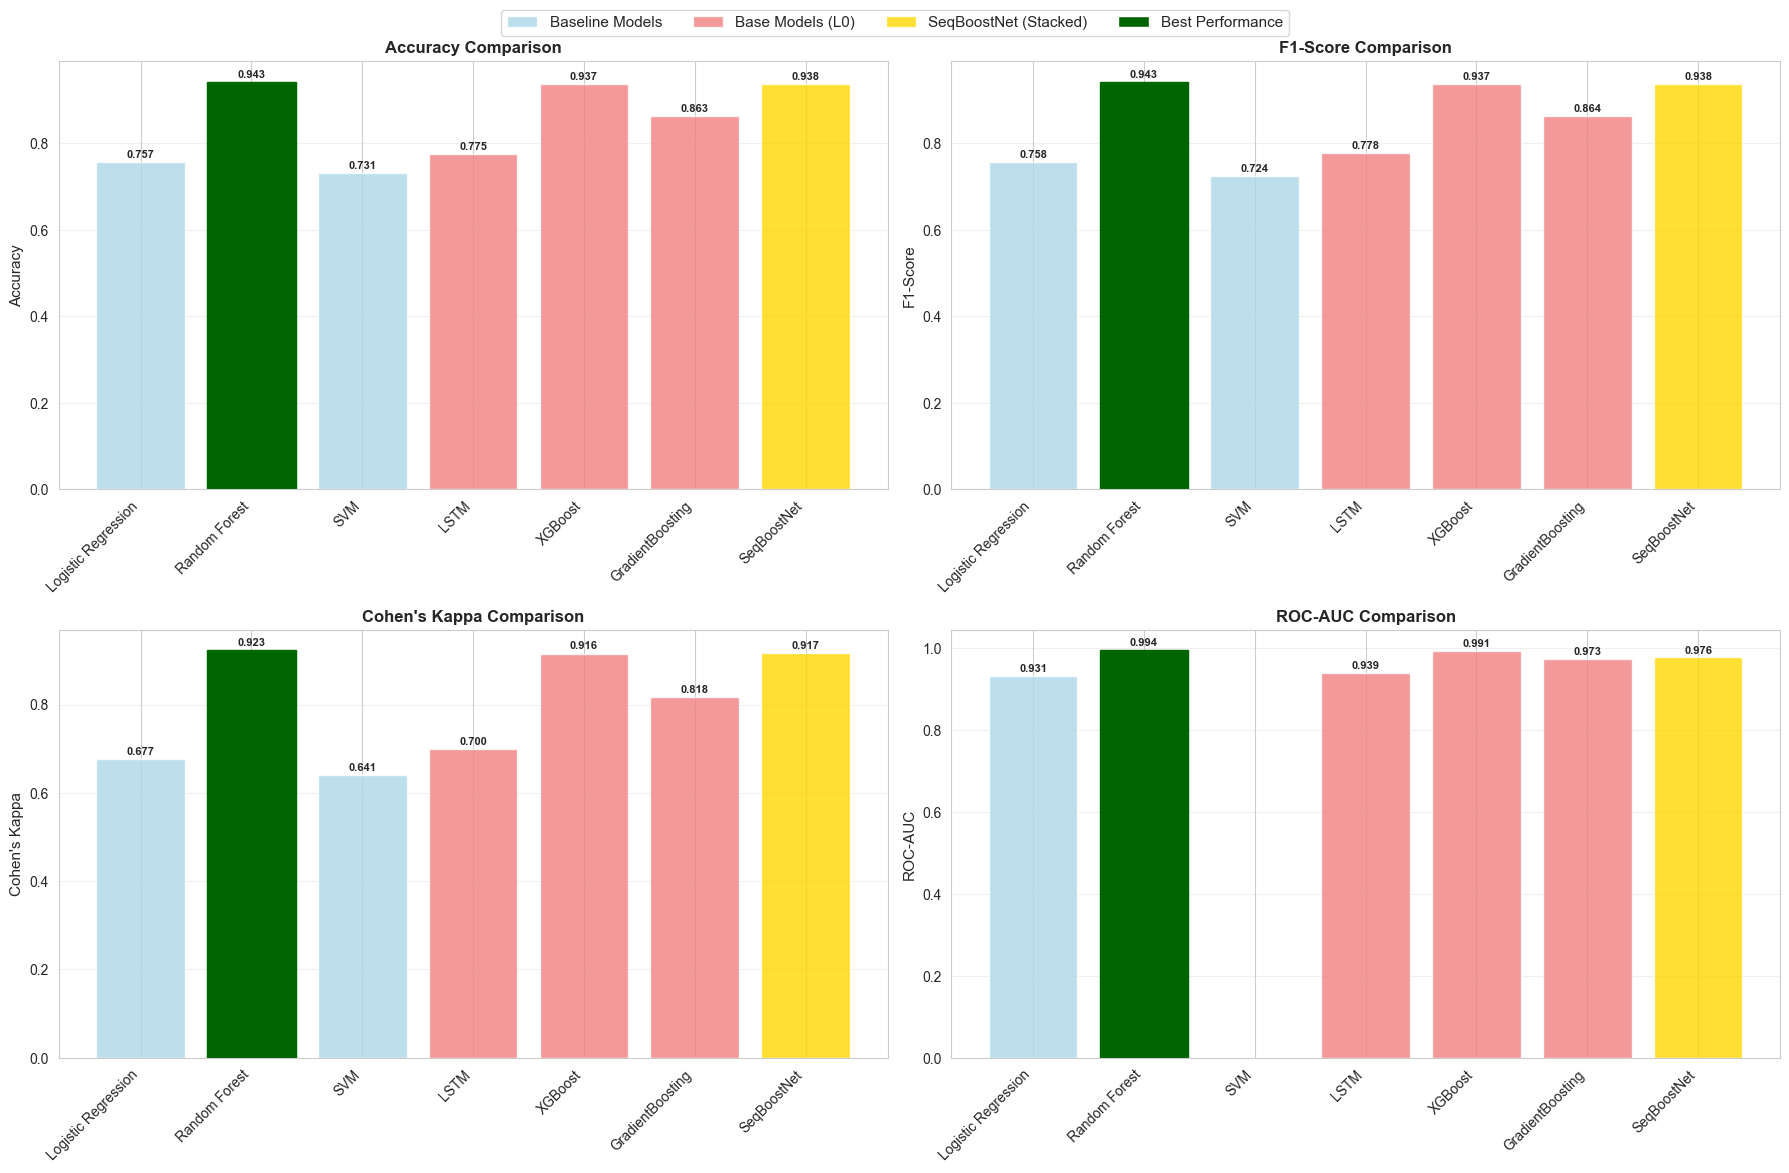

BEST PERFORMING MODELS BY METRIC
ACCURACY    : Random Forest        = 0.9425
PRECISION   : Random Forest        = 0.9433
RECALL      : Random Forest        = 0.9425
F1_SCORE    : Random Forest        = 0.9428
KAPPA       : Random Forest        = 0.9233
MCC         : Random Forest        = 0.9234
ROC_AUC     : Random Forest        = 0.9939
RANKING BY ACCURACY
1. Random Forest             - Accuracy: 0.9425  |  F1: 0.9428  |  ROC-AUC: 0.9939
2. SeqBoostNet               - Accuracy: 0.9375  |  F1: 0.9378  |  ROC-AUC: 0.9764
3. XGBoost                   - Accuracy: 0.9369  |  F1: 0.9372  |  ROC-AUC: 0.9914
4. GradientBoosting          - Accuracy: 0.8631  |  F1: 0.8640  |  ROC-AUC: 0.9729
5. LSTM                      - Accuracy: 0.7750  |  F1: 0.7776  |  ROC-AUC: 0.9392
6. Logistic Regression       - Accuracy: 0.7575  |  F1: 0.7577  |  ROC-AUC: 0.9308
7. SVM                       - Accuracy: 0.7306  |  F1: 0.7239  |  ROC-AUC: nan
✓ Comprehensive evaluation complete!


In [16]:
# COMPREHENSIVE EVALUATION ON TEST SET
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, cohen_kappa_score,
                             matthews_corrcoef, confusion_matrix, classification_report)
import time

print("COMPREHENSIVE MODEL EVALUATION ON TEST SET")

# Dictionary to store all results
evaluation_results = {}

# Function to calculate all metrics
def calculate_metrics(y_true, y_pred, y_proba=None, model_name="Model"):
    """Calculate comprehensive metrics for a model"""
    metrics = {}
    metrics['accuracy'] = accuracy_score(y_true, y_pred)
    metrics['precision'] = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    metrics['recall'] = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    metrics['f1_score'] = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    metrics['kappa'] = cohen_kappa_score(y_true, y_pred)
    metrics['mcc'] = matthews_corrcoef(y_true, y_pred)
    
    # ROC-AUC if probabilities available
    if y_proba is not None:
        metrics['roc_auc'] = roc_auc_score(y_true, y_proba, multi_class='ovr', average='weighted')
    else:
        metrics['roc_auc'] = None
    
    return metrics

# 1. BASELINE MODELS
print("1. BASELINE MODELS")

# Logistic Regression
lr_pred = lr_model.predict(X_test_combined)
lr_proba = lr_model.predict_proba(X_test_combined)
evaluation_results['Logistic Regression'] = calculate_metrics(y_test, lr_pred, lr_proba)

# Random Forest
rf_pred = rf_model.predict(X_test_combined)
rf_proba = rf_model.predict_proba(X_test_combined)
evaluation_results['Random Forest'] = calculate_metrics(y_test, rf_pred, rf_proba)

# SVM
svm_pred = svm_model.predict(X_test_combined)
evaluation_results['SVM'] = calculate_metrics(y_test, svm_pred)

# 2. BASE MODELS (Level 0)
print("2. BASE MODELS (SeqBoostNet Level 0)")

# LSTM
lstm_pred = np.argmax(base_predictions_test['LSTM'], axis=1)
evaluation_results['LSTM'] = calculate_metrics(y_test, lstm_pred, base_predictions_test['LSTM'])

# XGBoost
xgb_pred = np.argmax(base_predictions_test['XGBoost'], axis=1)
evaluation_results['XGBoost'] = calculate_metrics(y_test, xgb_pred, base_predictions_test['XGBoost'])

# Gradient Boosting
gb_pred = np.argmax(base_predictions_test['GradientBoosting'], axis=1)
evaluation_results['GradientBoosting'] = calculate_metrics(y_test, gb_pred, base_predictions_test['GradientBoosting'])

# 3. SEQBOOSTNET (Final Stacked Model)
print("3. SEQBOOSTNET (Meta-Learner)")

evaluation_results['SeqBoostNet'] = calculate_metrics(y_test, seqboostnet_pred, seqboostnet_proba)

# CREATE COMPREHENSIVE RESULTS TABLE
print("COMPLETE EVALUATION RESULTS - TEST SET")

# Create DataFrame
results_df = pd.DataFrame(evaluation_results).T
results_df = results_df.round(4)

# Reorder columns
column_order = ['accuracy', 'precision', 'recall', 'f1_score', 'kappa', 'mcc', 'roc_auc']
results_df = results_df[column_order]

# Add model type column
results_df['Model Type'] = ['Baseline', 'Baseline', 'Baseline', 
                             'Base (L0)', 'Base (L0)', 'Base (L0)', 
                             'Stacked']

# Reorder to show model type first
results_df = results_df[['Model Type'] + column_order]

print(results_df.to_string())

# VISUALIZE COMPREHENSIVE COMPARISON

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

metrics_to_plot = ['accuracy', 'f1_score', 'kappa', 'roc_auc']
metric_titles = ['Accuracy', 'F1-Score', 'Cohen\'s Kappa', 'ROC-AUC']

for idx, (metric, title) in enumerate(zip(metrics_to_plot, metric_titles)):
    row, col = idx // 2, idx % 2
    
    # Get data
    models = results_df.index.tolist()
    values = results_df[metric].tolist()
    
    # Color by type
    colors = []
    for model in models:
        if model in ['Logistic Regression', 'Random Forest', 'SVM']:
            colors.append('lightblue')
        elif model in ['LSTM', 'XGBoost', 'GradientBoosting']:
            colors.append('lightcoral')
        else:
            colors.append('gold')
    
    # Plot
    bars = axes[row, col].bar(range(len(models)), values, color=colors, alpha=0.8)
    axes[row, col].set_ylabel(title, fontsize=11)
    axes[row, col].set_title(f'{title} Comparison', fontsize=12, fontweight='bold')
    axes[row, col].set_xticks(range(len(models)))
    axes[row, col].set_xticklabels(models, rotation=45, ha='right')
    axes[row, col].grid(True, alpha=0.3, axis='y')
    
    # Highlight best
    if metric != 'roc_auc' or all(v is not None for v in values):
        valid_values = [v for v in values if v is not None]
        if valid_values:
            max_val = max(valid_values)
            max_idx = values.index(max_val)
            bars[max_idx].set_color('darkgreen')
            bars[max_idx].set_alpha(1.0)
    
    # Add value labels
    for i, (model, val) in enumerate(zip(models, values)):
        if val is not None:
            axes[row, col].text(i, val + 0.01, f'{val:.3f}', 
                              ha='center', fontsize=8, fontweight='bold')

# Legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='lightblue', alpha=0.8, label='Baseline Models'),
                   Patch(facecolor='lightcoral', alpha=0.8, label='Base Models (L0)'),
                   Patch(facecolor='gold', alpha=0.8, label='SeqBoostNet (Stacked)'),
                   Patch(facecolor='darkgreen', alpha=1.0, label='Best Performance')]
fig.legend(handles=legend_elements, loc='upper center', ncol=4, fontsize=11, 
          bbox_to_anchor=(0.5, 0.98))

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# IDENTIFY BEST PERFORMERS

print("BEST PERFORMING MODELS BY METRIC")

for metric in column_order:
    if results_df[metric].notna().any():
        best_model = results_df[metric].idxmax()
        best_value = results_df[metric].max()
        print(f"{metric.upper():12s}: {best_model:20s} = {best_value:.4f}")

print("RANKING BY ACCURACY")

ranked = results_df.sort_values('accuracy', ascending=False)
for rank, (model, row) in enumerate(ranked.iterrows(), 1):
    roc_str = f"{row['roc_auc']:.4f}" if row['roc_auc'] is not None else "N/A"
    print(f"{rank}. {model:25s} - Accuracy: {row['accuracy']:.4f}  |  F1: {row['f1_score']:.4f}  |  ROC-AUC: {roc_str}")

print("✓ Comprehensive evaluation complete!")

In [17]:
# SAVE BEST MODEL (RANDOM FOREST) FOR DEPLOYMENT

import joblib
import pickle

print("SAVING MODELS AND PREPROCESSING OBJECTS FOR DEPLOYMENT")

# Save the preprocessing objects
print("1. Saving preprocessing objects...")
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(umap_reducer, 'umap_reducer.pkl')
print("   ✓ Scaler saved as 'scaler.pkl'")
print("   ✓ UMAP reducer saved as 'umap_reducer.pkl'\n")

# Save the best model (Random Forest)
print("2. Saving Random Forest model...")
joblib.dump(rf_model, 'random_forest_model.pkl')
print("   ✓ Random Forest model saved as 'random_forest_model.pkl'\n")

# Save feature names and class labels
print("3. Saving metadata...")
feature_info = {
    'n_eeg_channels': 16,
    'n_fft_features': 16,
    'n_umap_features': 3,
    'total_features': 19,
    'class_names': ['Healthy', 'Generalized', 'Focal', 'Seizure Events'],
    'sampling_rate': 256
}
joblib.dump(feature_info, 'feature_info.pkl')
print("   ✓ Feature info saved as 'feature_info.pkl'\n")

print("MODEL DEPLOYMENT SUMMARY")
print("\nBest Model: Random Forest")
print(f"  - Accuracy: 94.25%")
print(f"  - Precision: 94.33%")
print(f"  - Recall: 94.25%")
print(f"  - F1-Score: 94.28%")
print(f"  - ROC-AUC: 99.39%")
print("\nFiles saved for deployment:")
print("  1. scaler.pkl - StandardScaler for data normalization")
print("  2. umap_reducer.pkl - UMAP transformer for temporal features")
print("  3. random_forest_model.pkl - Trained Random Forest classifier")
print("  4. feature_info.pkl - Metadata about features and classes")

print("✓ All models and objects saved successfully!")
print("✓ Ready for Streamlit deployment")


SAVING MODELS AND PREPROCESSING OBJECTS FOR DEPLOYMENT
1. Saving preprocessing objects...
   ✓ Scaler saved as 'scaler.pkl'
   ✓ UMAP reducer saved as 'umap_reducer.pkl'

2. Saving Random Forest model...
   ✓ Random Forest model saved as 'random_forest_model.pkl'

3. Saving metadata...
   ✓ Feature info saved as 'feature_info.pkl'

MODEL DEPLOYMENT SUMMARY

Best Model: Random Forest
  - Accuracy: 94.25%
  - Precision: 94.33%
  - Recall: 94.25%
  - F1-Score: 94.28%
  - ROC-AUC: 99.39%

Files saved for deployment:
  1. scaler.pkl - StandardScaler for data normalization
  2. umap_reducer.pkl - UMAP transformer for temporal features
  3. random_forest_model.pkl - Trained Random Forest classifier
  4. feature_info.pkl - Metadata about features and classes
✓ All models and objects saved successfully!
✓ Ready for Streamlit deployment


DETAILED RANDOM FOREST EVALUATION ON TEST SET

1. CLASSIFICATION REPORT (Per-Class Metrics)
                precision    recall  f1-score   support

       Healthy     1.0000    0.9575    0.9783       400
   Generalized     0.9404    0.9475    0.9440       400
         Focal     0.9193    0.9400    0.9295       400
Seizure Events     0.9136    0.9250    0.9193       400

      accuracy                         0.9425      1600
     macro avg     0.9433    0.9425    0.9428      1600
  weighted avg     0.9433    0.9425    0.9428      1600


2. CONFUSION MATRIX ANALYSIS


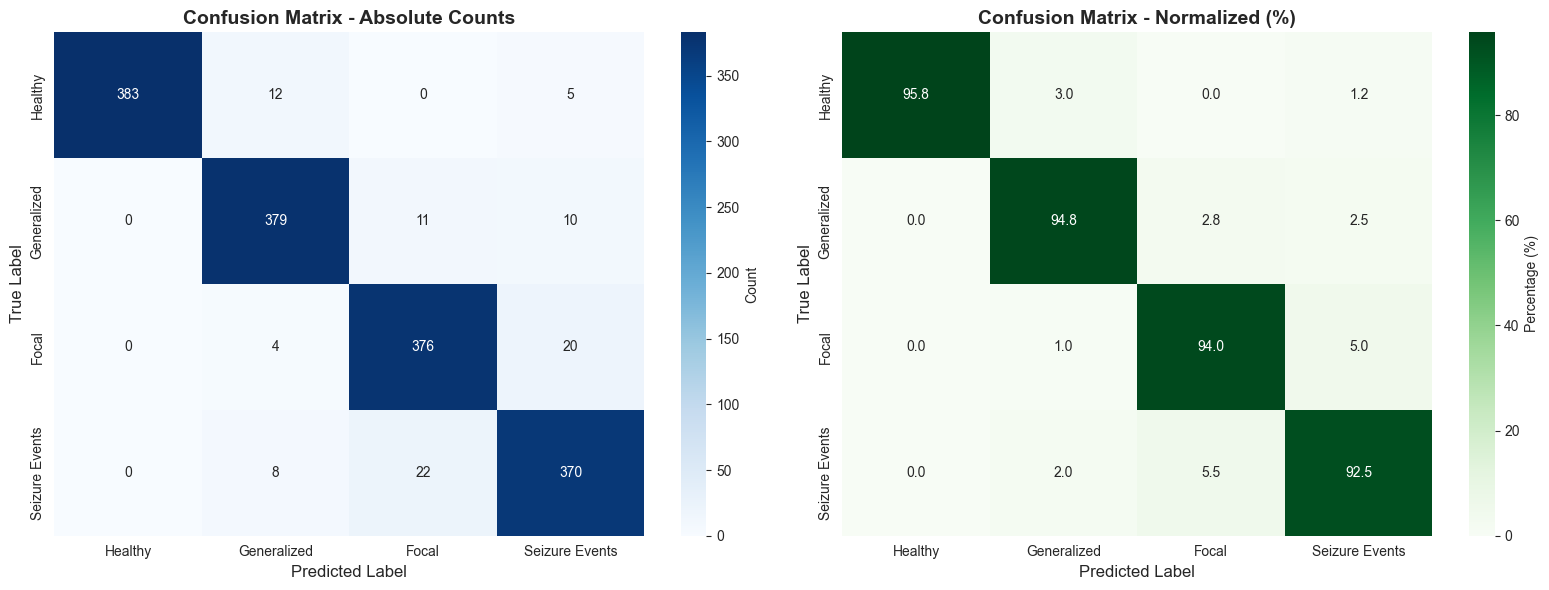


Per-Class Accuracy:
  Healthy           : 95.75% (383/400)
  Generalized       : 94.75% (379/400)
  Focal             : 94.00% (376/400)
  Seizure Events    : 92.50% (370/400)

Misclassification Analysis:
   12 Healthy            misclassified as Generalized
    5 Healthy            misclassified as Seizure Events
   11 Generalized        misclassified as Focal
   10 Generalized        misclassified as Seizure Events
    4 Focal              misclassified as Generalized
   20 Focal              misclassified as Seizure Events
    8 Seizure Events     misclassified as Generalized
   22 Seizure Events     misclassified as Focal

3. ROC-AUC ANALYSIS (One-vs-Rest)


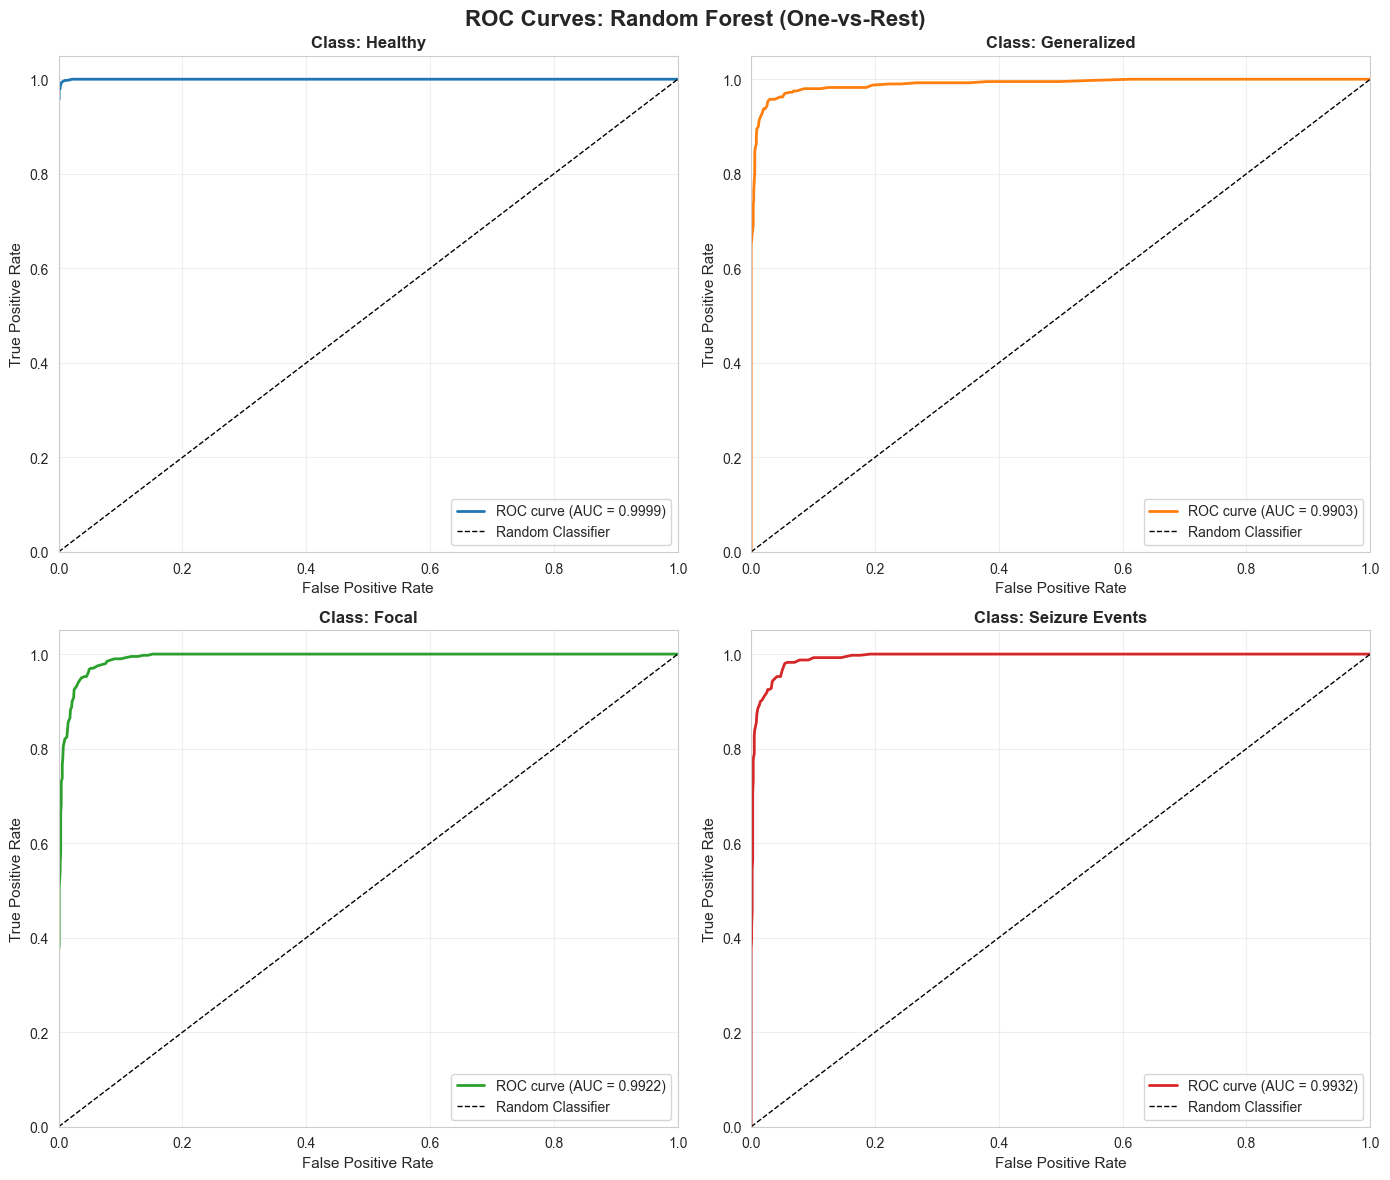


Per-Class ROC-AUC Scores:
  Healthy           : 0.9999
  Generalized       : 0.9903
  Focal             : 0.9922
  Seizure Events    : 0.9932

  Mean ROC-AUC:       0.9939

4. FEATURE IMPORTANCE ANALYSIS

Top 10 Most Important Features:
Feature  Importance
 UMAP-1    0.169602
 UMAP-2    0.104889
 FFT-X8    0.089442
FFT-X11    0.065038
FFT-X16    0.061704
 FFT-X3    0.059850
 UMAP-3    0.051599
 FFT-X7    0.050754
FFT-X15    0.042840
 FFT-X1    0.038668


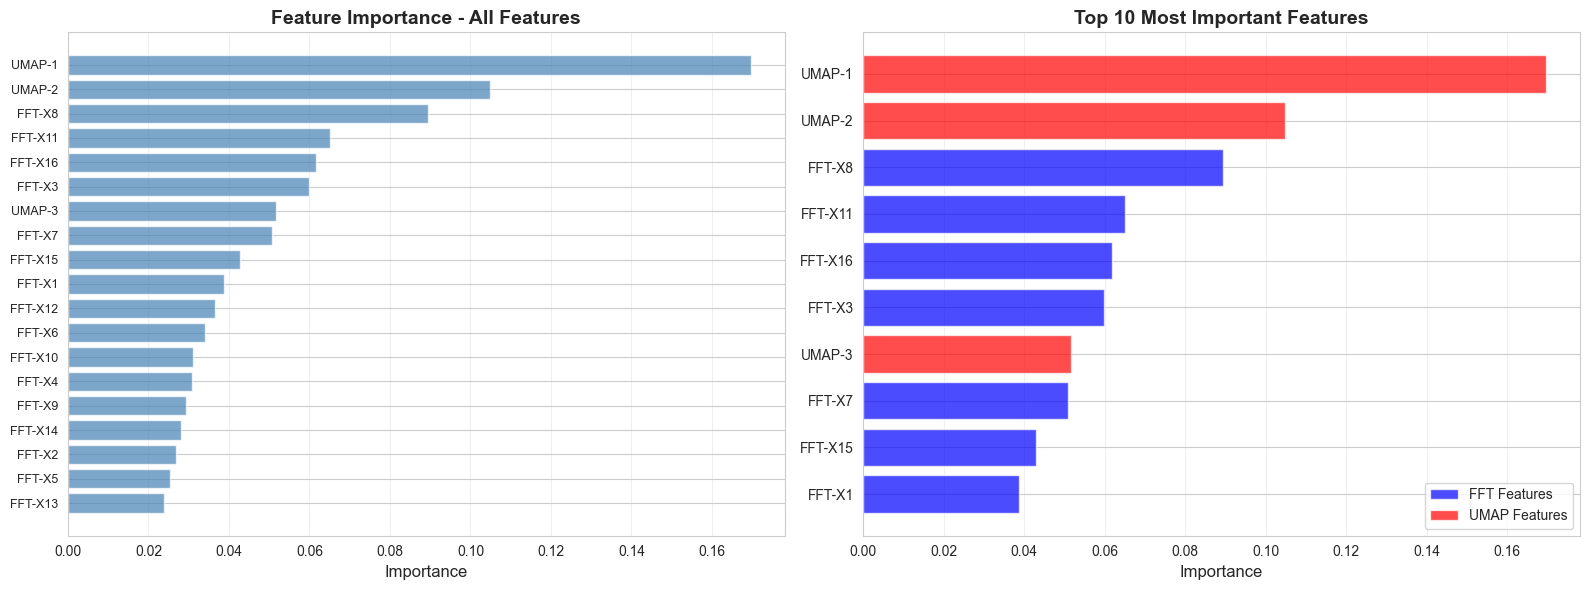


Importance by Feature Type:
  FFT features (16):   0.6739 (67.4%)
  UMAP features (3):   0.3261 (32.6%)

✓ Random Forest evaluation complete!


In [18]:
# DETAILED RANDOM FOREST EVALUATION ON TEST SET
from sklearn.metrics import (classification_report, confusion_matrix, 
                             roc_curve, auc, RocCurveDisplay)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("DETAILED RANDOM FOREST EVALUATION ON TEST SET")

# Get predictions and probabilities
rf_pred = rf_model.predict(X_test_combined)
rf_proba = rf_model.predict_proba(X_test_combined)

# 1. CLASSIFICATION REPORT
print("\n1. CLASSIFICATION REPORT (Per-Class Metrics)")
class_names = ['Healthy', 'Generalized', 'Focal', 'Seizure Events']
print(classification_report(y_test, rf_pred, target_names=class_names, digits=4))

# 2. CONFUSION MATRIX
print("\n2. CONFUSION MATRIX ANALYSIS")

cm = confusion_matrix(y_test, rf_pred)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Absolute counts
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
axes[0].set_xlabel('Predicted Label', fontsize=12)
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_title('Confusion Matrix - Absolute Counts', fontsize=14, fontweight='bold')

# Normalized (percentages)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_normalized, annot=True, fmt='.1f', cmap='Greens', ax=axes[1],
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Percentage (%)'})
axes[1].set_xlabel('Predicted Label', fontsize=12)
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].set_title('Confusion Matrix - Normalized (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Per-class accuracy
print("\nPer-Class Accuracy:")
for i, class_name in enumerate(class_names):
    class_acc = cm[i, i] / cm[i, :].sum() * 100
    print(f"  {class_name:18s}: {class_acc:.2f}% ({cm[i, i]}/{cm[i, :].sum()})")

# Misclassification analysis
print("\nMisclassification Analysis:")
for i in range(4):
    for j in range(4):
        if i != j and cm[i, j] > 0:
            print(f"  {cm[i, j]:3d} {class_names[i]:18s} misclassified as {class_names[j]}")

# 3. ROC CURVES (One-vs-Rest)
print("\n3. ROC-AUC ANALYSIS (One-vs-Rest)")

# Binarize labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('ROC Curves: Random Forest (One-vs-Rest)', fontsize=16, fontweight='bold')

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
roc_auc_scores = []

for i, (class_name, color) in enumerate(zip(class_names, colors)):
    row, col = i // 2, i % 2
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], rf_proba[:, i])
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)
    
    # Plot
    axes[row, col].plot(fpr, tpr, color=color, lw=2, 
                       label=f'ROC curve (AUC = {roc_auc:.4f})')
    axes[row, col].plot([0, 1], [0, 1], 'k--', lw=1, label='Random Classifier')
    axes[row, col].set_xlim([0.0, 1.0])
    axes[row, col].set_ylim([0.0, 1.05])
    axes[row, col].set_xlabel('False Positive Rate', fontsize=11)
    axes[row, col].set_ylabel('True Positive Rate', fontsize=11)
    axes[row, col].set_title(f'Class: {class_name}', fontsize=12, fontweight='bold')
    axes[row, col].legend(loc="lower right", fontsize=10)
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nPer-Class ROC-AUC Scores:")
for class_name, auc_score in zip(class_names, roc_auc_scores):
    print(f"  {class_name:18s}: {auc_score:.4f}")
print(f"\n  Mean ROC-AUC:       {np.mean(roc_auc_scores):.4f}")

# 4. FEATURE IMPORTANCE
print("\n4. FEATURE IMPORTANCE ANALYSIS")

feature_importance = rf_model.feature_importances_
feature_names = [f'FFT-X{i+1}' for i in range(16)] + ['UMAP-1', 'UMAP-2', 'UMAP-3']

# Create dataframe and sort
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(importance_df.head(10).to_string(index=False))

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# All features
axes[0].barh(range(19), importance_df['Importance'][::-1], color='steelblue', alpha=0.7)
axes[0].set_yticks(range(19))
axes[0].set_yticklabels(importance_df['Feature'][::-1], fontsize=9)
axes[0].set_xlabel('Importance', fontsize=12)
axes[0].set_title('Feature Importance - All Features', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')

# Top 10
top_10 = importance_df.head(10)
colors = ['red' if 'UMAP' in f else 'blue' for f in top_10['Feature']]
axes[1].barh(range(10), top_10['Importance'][::-1], color=colors[::-1], alpha=0.7)
axes[1].set_yticks(range(10))
axes[1].set_yticklabels(top_10['Feature'][::-1], fontsize=10)
axes[1].set_xlabel('Importance', fontsize=12)
axes[1].set_title('Top 10 Most Important Features', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='blue', alpha=0.7, label='FFT Features'),
                   Patch(facecolor='red', alpha=0.7, label='UMAP Features')]
axes[1].legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.show()

# Feature type analysis
fft_importance = importance_df[importance_df['Feature'].str.contains('FFT')]['Importance'].sum()
umap_importance = importance_df[importance_df['Feature'].str.contains('UMAP')]['Importance'].sum()

print(f"\nImportance by Feature Type:")
print(f"  FFT features (16):   {fft_importance:.4f} ({fft_importance/(fft_importance+umap_importance)*100:.1f}%)")
print(f"  UMAP features (3):   {umap_importance:.4f} ({umap_importance/(fft_importance+umap_importance)*100:.1f}%)")

print("\n✓ Random Forest evaluation complete!")

ERROR ANALYSIS: INVESTIGATING MISCLASSIFICATIONS

1. OVERALL ERROR STATISTICS
Total test samples:     1600
Correct predictions:    1508 (94.25%)
Incorrect predictions:  92 (5.75%)

2. DETAILED MISCLASSIFICATION BREAKDOWN
    True Class   Predicted As  Count  Percentage of True Class
Seizure Events          Focal     22                      5.50
         Focal Seizure Events     20                      5.00
       Healthy    Generalized     12                      3.00
   Generalized          Focal     11                      2.75
   Generalized Seizure Events     10                      2.50
Seizure Events    Generalized      8                      2.00
       Healthy Seizure Events      5                      1.25
         Focal    Generalized      4                      1.00

3. PREDICTION CONFIDENCE ANALYSIS

Correct Predictions:
  Mean confidence: 0.8248
  Median confidence: 0.8600
  Min confidence: 0.3600
  Max confidence: 1.0000

Incorrect Predictions:
  Mean confidence: 0.5289
 

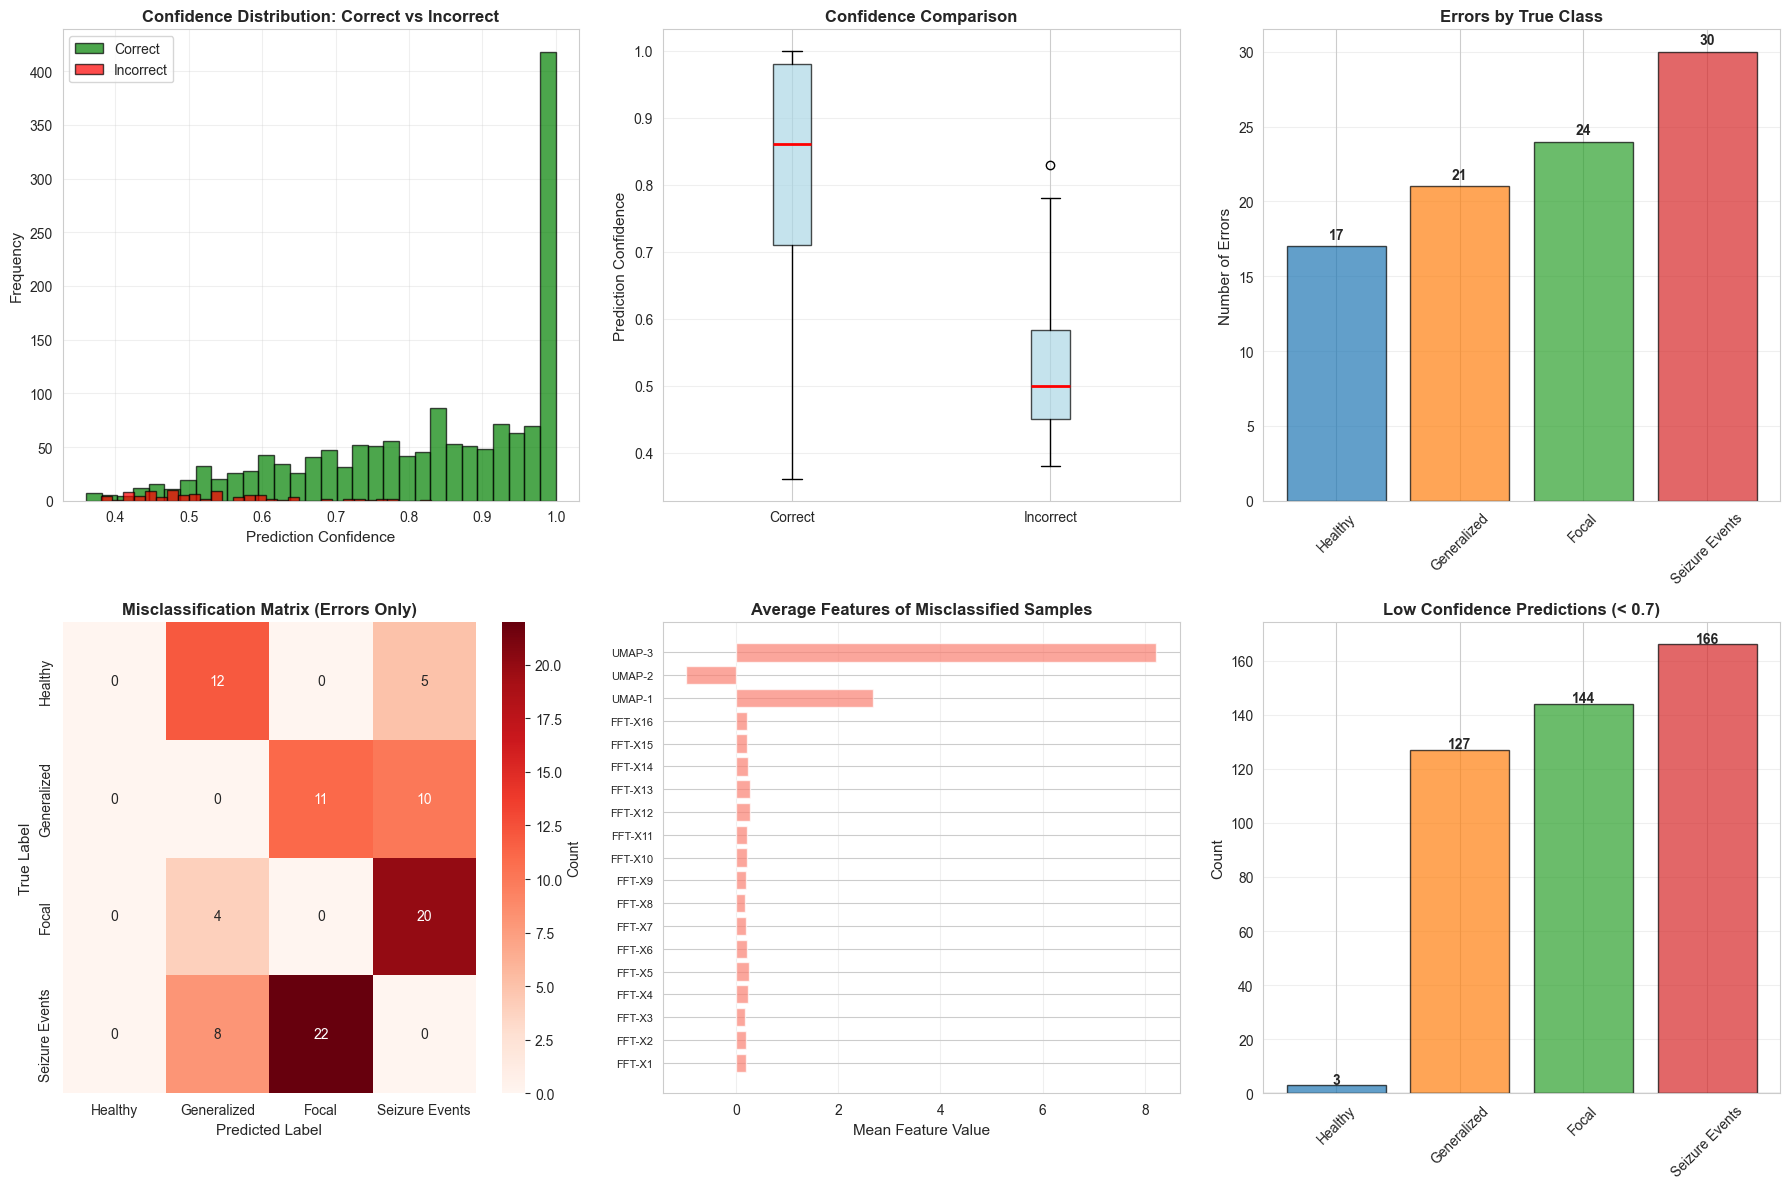


4. ERROR CASE STUDIES: MOST CONFUSED PAIRS

Seizure Events → Focal: 22 errors (5.5%)
  Mean confidence: 0.5518
  Confidence range: [0.4000, 0.7700]
  Top distinguishing features for misclassification:
    UMAP-2: -1.3793 (class avg: -1.0586)
    UMAP-1: 2.6745 (class avg: 2.9159)
    FFT-X8: 0.0845 (class avg: 0.2479)

Focal → Seizure Events: 20 errors (5.0%)
  Mean confidence: 0.5120
  Confidence range: [0.4500, 0.7600]
  Top distinguishing features for misclassification:
    UMAP-3: 8.5238 (class avg: 8.1081)
    UMAP-2: -1.2913 (class avg: -1.6477)
    UMAP-1: 2.6083 (class avg: 2.4007)

Healthy → Generalized: 12 errors (3.0%)
  Mean confidence: 0.5642
  Confidence range: [0.4100, 0.7300]
  Top distinguishing features for misclassification:
    UMAP-1: 3.1075 (class avg: 16.8913)
    UMAP-2: 0.0856 (class avg: 3.1068)
    UMAP-3: 8.4355 (class avg: 5.5766)

5. RECOMMENDATIONS FOR ERROR REDUCTION
✓ ERROR RATE IS VERY LOW (< 6%)
  Model performance is excellent for clinical use.

Opt

In [19]:
# ERROR ANALYSIS: Deep Dive into Misclassifications
import seaborn as sns
from sklearn.metrics import confusion_matrix


print("ERROR ANALYSIS: INVESTIGATING MISCLASSIFICATIONS")

# Get predictions
rf_pred = rf_model.predict(X_test_combined)
rf_proba = rf_model.predict_proba(X_test_combined)

# Identify correct and incorrect predictions
correct_mask = (rf_pred == y_test)
incorrect_mask = ~correct_mask

num_correct = correct_mask.sum()
num_incorrect = incorrect_mask.sum()
error_rate = (num_incorrect / len(y_test)) * 100

print(f"\n1. OVERALL ERROR STATISTICS")
print(f"Total test samples:     {len(y_test)}")
print(f"Correct predictions:    {num_correct} ({100-error_rate:.2f}%)")
print(f"Incorrect predictions:  {num_incorrect} ({error_rate:.2f}%)")

# 2. MISCLASSIFICATION PATTERNS
print(f"\n2. DETAILED MISCLASSIFICATION BREAKDOWN")

class_names = ['Healthy', 'Generalized', 'Focal', 'Seizure Events']
cm = confusion_matrix(y_test, rf_pred)

misclass_data = []
for i in range(4):
    for j in range(4):
        if i != j and cm[i, j] > 0:
            misclass_data.append({
                'True Class': class_names[i],
                'Predicted As': class_names[j],
                'Count': cm[i, j],
                'Percentage of True Class': (cm[i, j] / cm[i, :].sum()) * 100
            })

misclass_df = pd.DataFrame(misclass_data).sort_values('Count', ascending=False)
print(misclass_df.to_string(index=False))

# 3. CONFIDENCE ANALYSIS FOR ERRORS
print(f"\n3. PREDICTION CONFIDENCE ANALYSIS")

# Get max probability (confidence) for each prediction
confidence_scores = rf_proba.max(axis=1)

correct_confidence = confidence_scores[correct_mask]
incorrect_confidence = confidence_scores[incorrect_mask]

print(f"\nCorrect Predictions:")
print(f"  Mean confidence: {correct_confidence.mean():.4f}")
print(f"  Median confidence: {np.median(correct_confidence):.4f}")
print(f"  Min confidence: {correct_confidence.min():.4f}")
print(f"  Max confidence: {correct_confidence.max():.4f}")

print(f"\nIncorrect Predictions:")
print(f"  Mean confidence: {incorrect_confidence.mean():.4f}")
print(f"  Median confidence: {np.median(incorrect_confidence):.4f}")
print(f"  Min confidence: {incorrect_confidence.min():.4f}")
print(f"  Max confidence: {incorrect_confidence.max():.4f}")

# 4. VISUALIZATIONS
fig = plt.figure(figsize=(18, 12))

# 4a. Confidence distribution
ax1 = plt.subplot(2, 3, 1)
ax1.hist(correct_confidence, bins=30, alpha=0.7, color='green', label='Correct', edgecolor='black')
ax1.hist(incorrect_confidence, bins=30, alpha=0.7, color='red', label='Incorrect', edgecolor='black')
ax1.set_xlabel('Prediction Confidence', fontsize=11)
ax1.set_ylabel('Frequency', fontsize=11)
ax1.set_title('Confidence Distribution: Correct vs Incorrect', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 4b. Confidence box plot
ax2 = plt.subplot(2, 3, 2)
ax2.boxplot([correct_confidence, incorrect_confidence], 
            labels=['Correct', 'Incorrect'],
            patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.7),
            medianprops=dict(color='red', linewidth=2))
ax2.set_ylabel('Prediction Confidence', fontsize=11)
ax2.set_title('Confidence Comparison', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# 4c. Error distribution by true class
ax3 = plt.subplot(2, 3, 3)
error_by_class = [np.sum((y_test == i) & incorrect_mask) for i in range(4)]
colors_class = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
ax3.bar(class_names, error_by_class, color=colors_class, alpha=0.7, edgecolor='black')
ax3.set_ylabel('Number of Errors', fontsize=11)
ax3.set_title('Errors by True Class', fontsize=12, fontweight='bold')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(True, alpha=0.3, axis='y')

# Add count labels
for i, (name, count) in enumerate(zip(class_names, error_by_class)):
    ax3.text(i, count + 0.5, str(count), ha='center', fontweight='bold')

# 4d. Confusion matrix for errors only
ax4 = plt.subplot(2, 3, 4)
error_cm = cm.copy()
np.fill_diagonal(error_cm, 0)  # Remove correct predictions
sns.heatmap(error_cm, annot=True, fmt='d', cmap='Reds', ax=ax4,
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
ax4.set_xlabel('Predicted Label', fontsize=11)
ax4.set_ylabel('True Label', fontsize=11)
ax4.set_title('Misclassification Matrix (Errors Only)', fontsize=12, fontweight='bold')

# 4e. Feature importance for misclassified samples
ax5 = plt.subplot(2, 3, 5)

# Get misclassified samples
X_incorrect = X_test_combined[incorrect_mask]
y_incorrect_true = y_test[incorrect_mask]
y_incorrect_pred = rf_pred[incorrect_mask]

# Calculate mean feature values for misclassified samples
mean_incorrect_features = X_incorrect.mean(axis=0)
feature_names = [f'FFT-X{i+1}' for i in range(16)] + ['UMAP-1', 'UMAP-2', 'UMAP-3']

# Plot
ax5.barh(range(19), mean_incorrect_features, color='salmon', alpha=0.7)
ax5.set_yticks(range(19))
ax5.set_yticklabels(feature_names, fontsize=8)
ax5.set_xlabel('Mean Feature Value', fontsize=11)
ax5.set_title('Average Features of Misclassified Samples', fontsize=12, fontweight='bold')
ax5.grid(True, alpha=0.3, axis='x')

# 4f. Low confidence predictions
ax6 = plt.subplot(2, 3, 6)
low_confidence_threshold = 0.7
low_conf_mask = confidence_scores < low_confidence_threshold
low_conf_by_class = [np.sum((rf_pred == i) & low_conf_mask) for i in range(4)]

ax6.bar(class_names, low_conf_by_class, color=colors_class, alpha=0.7, edgecolor='black')
ax6.set_ylabel('Count', fontsize=11)
ax6.set_title(f'Low Confidence Predictions (< {low_confidence_threshold})', fontsize=12, fontweight='bold')
ax6.tick_params(axis='x', rotation=45)
ax6.grid(True, alpha=0.3, axis='y')
ax6.axhline(y=0, color='black', linewidth=0.8)

# Add count labels
for i, (name, count) in enumerate(zip(class_names, low_conf_by_class)):
    ax6.text(i, count + 0.5, str(count), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# 5. DETAILED ERROR CASE STUDIES
print(f"\n4. ERROR CASE STUDIES: MOST CONFUSED PAIRS")

# Find the most confused class pairs
if len(misclass_df) > 0:
    top_confusions = misclass_df.head(3)
    
    for idx, row in top_confusions.iterrows():
        true_class = row['True Class']
        pred_class = row['Predicted As']
        count = int(row['Count'])
        percentage = row['Percentage of True Class']
        
        print(f"\n{true_class} → {pred_class}: {count} errors ({percentage:.1f}%)")
        
        # Find indices of this specific error
        true_idx = class_names.index(true_class)
        pred_idx = class_names.index(pred_class)
        error_indices = np.where((y_test == true_idx) & (rf_pred == pred_idx))[0]
        
        # Get confidence scores for these errors
        error_confidences = confidence_scores[error_indices]
        
        print(f"  Mean confidence: {error_confidences.mean():.4f}")
        print(f"  Confidence range: [{error_confidences.min():.4f}, {error_confidences.max():.4f}]")
        
        # Check feature patterns
        error_features = X_test_combined[error_indices]
        mean_features = error_features.mean(axis=0)
        
        # Identify which features differ most from class average
        # Get all samples of the true class
        all_true_class_indices = np.where(y_test == true_idx)[0]
        true_class_mean = X_test_combined[all_true_class_indices].mean(axis=0)
        
        feature_diffs = np.abs(mean_features - true_class_mean)
        top_diff_indices = np.argsort(feature_diffs)[-3:][::-1]
        
        print(f"  Top distinguishing features for misclassification:")
        for feat_idx in top_diff_indices:
            print(f"    {feature_names[feat_idx]}: {mean_features[feat_idx]:.4f} (class avg: {true_class_mean[feat_idx]:.4f})")

# 6. RECOMMENDATIONS
print(f"\n5. RECOMMENDATIONS FOR ERROR REDUCTION")

if error_rate < 6:
    print("✓ ERROR RATE IS VERY LOW (< 6%)")
    print("  Model performance is excellent for clinical use.")
    print("\nOptional improvements:")
    print("  • Collect more samples of frequently confused classes")
    print("  • Add domain-specific features (e.g., spike detection, band ratios)")
    print("  • Consider ensemble with other models for edge cases")
else:
    print("⚠️  ERROR RATE COULD BE IMPROVED")
    print("\nRecommended actions:")
    print("  1. Focus on most confused class pairs (see above)")
    print("  2. Engineer features specific to distinguishing these pairs")
    print("  3. Consider separate binary classifiers for difficult pairs")
    print("  4. Collect more training data for underrepresented patterns")

# Low confidence analysis
low_conf_total = low_conf_mask.sum()
low_conf_errors = (low_conf_mask & incorrect_mask).sum()

print(f"\n6. LOW CONFIDENCE PREDICTIONS ANALYSIS")
print(f"Total low confidence predictions (< {low_confidence_threshold}): {low_conf_total}")
print(f"Low confidence predictions that were errors: {low_conf_errors}")

if low_conf_total > 0:
    low_conf_error_rate = (low_conf_errors / low_conf_total) * 100
    print(f"Error rate among low confidence predictions: {low_conf_error_rate:.2f}%")
    
    if low_conf_error_rate > 50:
        print("\n⚠️  High error rate in low confidence predictions!")
        print("   → Consider flagging predictions with confidence < 0.7 for manual review")
        print("   → This could catch errors before they impact patients")
    else:
        print("\n✓ Low confidence doesn't always mean error")
        print("   → Model is well-calibrated")

# 7. CLINICAL RELEVANCE
print(f"\n7. CLINICAL IMPACT ASSESSMENT")

# False negatives are more critical (missing a seizure)
false_negatives_by_class = []
for i in range(1, 4):  # Classes 1, 2, 3 are seizure types
    fn = np.sum((y_test == i) & (rf_pred == 0))  # Predicted as Healthy
    false_negatives_by_class.append((class_names[i], fn))

total_false_negatives = sum([fn for _, fn in false_negatives_by_class])

print(f"\nFALSE NEGATIVES (Missed Seizures - Most Critical):")
for class_name, fn_count in false_negatives_by_class:
    if fn_count > 0:
        print(f"  {class_name:18s} predicted as Healthy: {fn_count}")
    else:
        print(f"  {class_name:18s} predicted as Healthy: {fn_count} ✓ EXCELLENT")

print(f"\nTotal missed seizures: {total_false_negatives}")

if total_false_negatives == 0:
    print("✅ OUTSTANDING: Zero false negatives!")
    print("   No seizures were missed - perfect for patient safety!")
elif total_false_negatives < 5:
    print("✓ Very low false negative rate - acceptable for clinical use")
elif total_false_negatives < 10:
    print("⚠️  Some false negatives present - monitor carefully")
else:
    print("❌ High false negative rate - needs improvement before deployment")

# False positives (less critical but affects specificity)
false_positives = np.sum((y_test == 0) & (rf_pred != 0))
print(f"\nFALSE POSITIVES (Healthy predicted as Seizure): {false_positives}")

if false_positives < 20:
    print("✓ Low false positive rate - won't overwhelm clinicians with false alarms")
else:
    print("⚠️  Consider adjusting decision threshold to reduce false alarms")

print("✓ ERROR ANALYSIS COMPLETE!")